# An Analysis of Developer Communities: Insights from the 2022 Stack Overflow global Survey

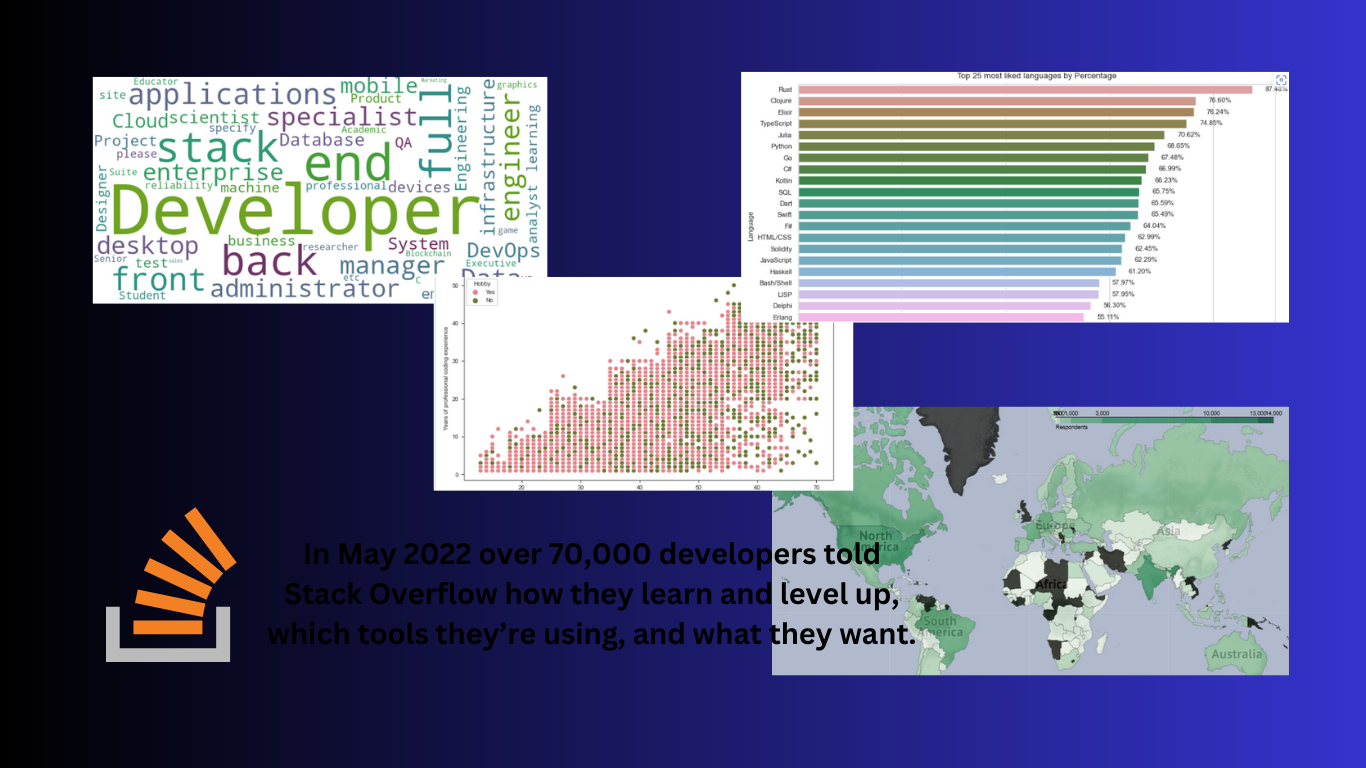

### Exploratory Data Analysis(EDA)

Exploratory Data Analysis (EDA) is an approach used to analyze and summarize data to gain insights and develop an understanding of the dataset to make more informed decisions.It involves visualizing and summarizing data using statistical and graphical techniques without making any assumptions or fitting any models to the data.

The main objectives of EDA :
- To Gain a deeper understanding of the dataset and the relationships between variables.
- Identify patterns, trends, and anomalies in the data.
- Prepare the data for further analysis, such as modeling or hypothesis testing.

Basically, EDA is an important and first step in data analysis that helps to guide subsequent analysis and ensure that the data is suitable for the intended purpose.

### Stack Overflow 

Stack Overflow is public platform or community based space to find and contribute answers to programming questions.Created in 2008 by Joel Spolsky and Jeff Atwood and since then Stack Overflow is most visted sites on internet.
Stack Overflow also has a reputation system to reward users for contributing helpful answers and participating in their community.
Every year Stack Overflow conducts survey were respondents are recruited primarily through channels owned by Stack Overflow.In year 2022, about 73,268 developers from 180 countries took Stack Overflow survey.

#### Project Outline
* Install and Import the required libraries.
* Data preparation and cleaning with pandas.
* Performing exploratory analysis and visualization.
* Asking and answering interesting questions.
* Summarizing inferences and drawing conclusions.


### Introduction

We will perform exploratory data analysis(EDA) on the StackOverflow Developer Survey 2022 dataset. This dataset contains responses to an annual survey conducted by StackOverflow. You can find the dataset on: https://insights.stackoverflow.com/survey

The survey was fielded from May 11, 2022 to June 1, 2022.The number of responses we consider “qualified” for analytical purposes based on time spent on the full, completed survey; another approximately 53 responses were submitted but not included in the analysis because respondents spent less than three minutes on the survey.-*source Stack Overflow*

### 1. Install and Import required libraries

Pip is the standard package installer for Python, use `!pip install package_name` when a package is not included in standard library.
Below are the packages we need to install and import for this project.

In [1]:
 # import data manipulation and data analysis libary in python
import pandas as pd   

# import numerical computing library in Python
import numpy as np

# import library for creating static plots and visualizations
import matplotlib
import matplotlib.pyplot as plt 

# to turn on “inline plotting”, to make plot graphics appear in notebook
%matplotlib inline 

# import the Seaborn library for statistical data visualization
import seaborn as sns 

# import the Plotly Express library for interactive data visualization
import plotly.express as px

# for plotting geospatial data with folium library
import folium 

# import WordCloud library for creating word clouds
import wordcloud


###  Download the dataset

There are several options to get dataset into Jupyter:

* Download CSV file manually and upload it via Jupyter's GUI.
* Use the urlretrieve function from the urllib.request to download CSV files from a raw URL.
* Use the opendatasets library to download datasets from Kaggle datasets and Google Drive URLs.
In this project, we will host the dataset on Google Drive at this location: 
https://drive.google.com/file/d/1tfBHyNbk8sp-nuE8L7wOB5T7KK9uNNIx/view?usp=share_link

Now,we will use opendatasets helper library to download files from the above URL.

In [2]:
!pip install opendatasets
import opendatasets as od
survey_url='https://drive.google.com/file/d/1tfBHyNbk8sp-nuE8L7wOB5T7KK9uNNIx/view?usp=share_link'
od.download(survey_url)

12089826it [00:00, 983102085.13it/s]


Downloaded and unzipped to  ./stack-overflow-developer-survey-2022


In [3]:
# check that the dataset is in stack-overflow-developer-survey-2022 and get list of files in it
import os
data_dir='stack-overflow-developer-survey-2022'
os.listdir(data_dir)

['survey_results_schema.csv',
 'README_2022.txt',
 'so_survey_2022.pdf',
 'survey_results_public.csv']

### 2. Data Preprocessing and Cleaning

For any business intelligence strategy the quality of data is the most crucial element.
Data preprocessing is a critical step that encompases various techniques to transform raw data into a format that is suitable for analysis.
Data cleaning involves fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

Before we could dive into analysis , let's check the schema file which consists survey questions.

In [4]:
# refer to schema file
schema_file = data_dir + '/survey_results_schema.csv'
schema_df = pd.read_csv(schema_file,index_col='qname')

Let's check the survey questions asked.

In [5]:
schema_df.iloc[2]

qid                                                        QID1
question      <span style="font-size:22px; font-family: aria...
force_resp                                                False
type                                                         DB
selector                                                     TB
Name: S1, dtype: object

As, there are some HTMl tags with text of questions. For better readbility ,let's clean schema_df.

In [6]:
# import re module to get support for regular expressions in python
import re

# function that takes a string of HTML code as input and returns the cleaned text
def clean_html_tags(html_string):
    # a regular expression to search for and replace all HTML tags with an empty string
    clean_text = re.sub('<[^<]+?>', '', html_string)
    # return the cleaned text with leading and trailing whitespace removed
    return clean_text.strip()

Now, we apply the `clean_html_tags()` function to the question column of the schema_df DataFrame using the `apply()` method. This cleans up any HTML tags that may be present in the question column.

Secondly,replaces any newline characters (\n) in the question column with an empty string using the `str.replace()` method. This ensures that all text in the question column is formatted consistently and does not contain any unwanted newline characters.

In [7]:
schema_df['question'] = schema_df['question'].apply(clean_html_tags).str.replace('\n','')

- We see qname as index, to simplify will make qname as dataframe column.

In [8]:
# to set the maximum column width for display in the DataFrame to 300 characters
pd.options.display.max_colwidth = 300

schema_df1=schema_df['question']
schema_df2=pd.DataFrame(schema_df1).reset_index()
schema_df2.iloc[1:]

,qname,question
1,MetaInfo,Browser Meta Info
2,S1,Basic InformationThe first section will focus on some basic information about who you are.Most questions in this section are required. Required questions are noted with *.
3,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."" *"
4,Employment,Which of the following best describes your current employment status?
5,RemoteWork,Which best describes your current work situation?
...,...,...
74,Frequency_2,Interacting with people outside of your immediate team?
75,Frequency_3,Encountering knowledge silos (where one individual or team has information that's not shared or distributed with other individuals or teams) at work?
76,TrueFalse_1,Are you involved in supporting new hires during their onboarding?
77,TrueFalse_2,Do you use learning resources provided by your employer?


Let's take a look at `Employment` question asked to survey respondents.

In [9]:
Emp_Ques = schema_df2[schema_df2['qname']=='Employment']['question'].to_string(index=False)
Emp_Ques

'Which of the following best describes your current employment status?'

Now, we will read survey data CSV file using Pandas library.

In [10]:
# load csv files
import pandas as pd
survey_df=pd.read_csv(data_dir +'/survey_results_public.csv')

Take a look at first 5 rows.

In [11]:
survey_df.head(5)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write code sometimes as part of my work","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Friend or family member;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)",Technical documentation;Blogs;Programming Games;Written Tutorials;Stack Overflow,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., University, College, etc)",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);On the job training","Technical documentation;Blogs;Stack Overflow;Online books;Video-based Online Courses;Online challenges (e.g., daily or weekly coding challenges)",NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


Let's get more basic information about this survey_df dataframe.

In [12]:
survey_df.shape

(73268, 79)

In [13]:
survey_df.size

5788172

As, there are 79 columns we will be selecting columns relevant for our analysis.

In [14]:
#select subset of columns relevant for our analysis:
survey_df_cols=[# demograpics
'EdLevel','Country','Age','Gender','Ethnicity',
# professional experience
'MainBranch','CodingActivities','LearnCode','YearsCode','YearsCodePro','LanguageHaveWorkedWith','LanguageWantToWorkWith','WorkExp',
#Employment
'Employment','DevType','OrgSize',
#Respondents attitude and behaviour
'Blockchain','MentalHealth','TimeSearching','TimeAnswering']

In [15]:
#how many cols selected
len(survey_df_cols)

20

Let's make a copy of survey_df with these subset of columns to survey_df1, new dataframe.

In [16]:
# let's make a copy of this selected cols data into new data frame survey_df1
survey_df1=survey_df[survey_df_cols].copy()

Before, we start knowing more about our data we will do basic check like number of null and unique values in each columns.
The output of the below code snippet will show us : column information, its null values and unique values in each column.

In [17]:
import pandas as pd
from tabulate import tabulate


# Check for null and unique values
null_values = survey_df1.isnull().sum()
unique_values = survey_df1.nunique()

# Create a new dataframe
null_unique_df = pd.DataFrame({'Data Type': survey_df1.dtypes, 'Null Values': null_values.values, 'Unique Values': unique_values.values})
null_unique_df.index.name='Column Names'


# Display the information and null/unique values as a table
print(tabulate(null_unique_df, headers='keys', tablefmt='psql'))


+------------------------+-------------+---------------+-----------------+
| Column Names           | Data Type   |   Null Values |   Unique Values |
|------------------------+-------------+---------------+-----------------|
| EdLevel                | object      |          1697 |               9 |
| Country                | object      |          1497 |             180 |
| Age                    | object      |          2322 |               8 |
| Gender                 | object      |          2415 |              16 |
| Ethnicity              | object      |          3794 |            1055 |
| MainBranch             | object      |             0 |               6 |
| CodingActivities       | object      |         14369 |              63 |
| LearnCode              | object      |          1688 |             737 |
| YearsCode              | object      |          1937 |              52 |
| YearsCodePro           | object      |         21435 |              52 |
| LanguageHaveWorkedWith 

Almost all columns have null values, except MainBranch as it was mandotary to choose any one out of 6 options provided, which is why we see MainBranch has 6 unique values.
MainBranch represents basic information of respondents in survey questionnaire.

Now, that we see some of the columns which has to be numeric , but may be those columns contain 'nan' values,those columns are treated as object type rather 'int' or 'float' type.

In [18]:
# let's convert some other columns into numeric data
survey_df1['YearsCode']=pd.to_numeric(survey_df1.YearsCode,errors='coerce')
survey_df1['YearsCodePro']=pd.to_numeric(survey_df1.YearsCodePro,errors='coerce')

#### summary statistics of the dataset

In [19]:
survey_df1.describe()

Column Names,YearsCode,YearsCodePro,WorkExp
count,69746.000000,49820.000000,36769.000000
mean,12.403951,10.268727,10.242378
std,9.722896,8.576772,8.706850
min,1.000000,1.000000,0.000000
25%,5.000000,4.000000,4.000000
50%,10.000000,8.000000,8.000000
75%,17.000000,15.000000,15.000000
max,50.000000,50.000000,50.000000


Now, we see WorkExp column has max value of 50, let's do some data validation.
If work experience of respondent is larger than the age , it's better to discard that row. There an be many reasons for that:
- Respondent accidently filled up wrong age or work experience value.
- Respondent didnt take the survey serious or considered important to give true values

Let's see the unique values in work experience column.

In [20]:
survey_df1['WorkExp'].unique()

array([nan,  6., 14.,  5., 15.,  4., 23.,  9., 22., 21.,  3., 28.,  7.,
       12.,  8.,  2., 20., 27.,  1., 10., 19., 13., 30., 11., 18., 47.,
       17., 46., 25., 24., 31.,  0., 41., 43., 40., 16., 42., 35., 32.,
       34., 26., 36., 38., 29., 33., 44., 37., 50., 45., 39., 48., 49.])

Let's check how many respondents have work experience more than age mentioned.

In [21]:
survey_df1[survey_df1['WorkExp'] ==50.0]['Age'].value_counts()

65 years or older     38
55-64 years old        6
18-24 years old        6
35-44 years old        5
Prefer not to say      4
Under 18 years old     4
25-34 years old        2
45-54 years old        1
Name: Age, dtype: int64

From the above , its clear that some enteries have age less than the work experience mentioned.We will remove those rows from the data loaded.

In [22]:
survey_df1['Age'].unique()

array([nan, '25-34 years old', '35-44 years old', 'Under 18 years old',
       '18-24 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

To drop rows where WorkExp is more than a given age, we first need to convert the age ranges into numeric values. Since the age ranges are not consistent, we will need to make some assumptions about their values. For example, we can assume that "18 or below" means an age of 18, and "65 or Older" means an age of 65.
Once we have converted the age ranges into numeric values, we can use a boolean mask to filter out the rows where WorkExp is greater than the age. Here's the code:

In [23]:
# create a dictionary to convert age ranges into numeric values
import numpy as np
age_dict={
    'nan':np.nan,
    '25-34 years old': 30,
    '35-44 years old' : 40,
    'Under 18 years old' :18,
     '18-24 years old': 20,
    '45-54 years old':50,
    '55-64 years old':60,
    '65 years or older':65,
    'Prefer not to say':np.nan
}

In [24]:
# create a copy of survey_df1
survey_df2=survey_df1.copy()

In [25]:
# convert age column to numeric values

survey_df2['Age']=survey_df2['Age'].map(age_dict)

# let's consider rowswhere WorkExp is lesser than Age : Boolean Mask

bool_mask=survey_df2['WorkExp'] < survey_df2['Age']

# apply the bool_mask to the DataFrame to drop the rows where WorkExp is greater than Age
survey_df2 = survey_df2[bool_mask]
survey_df2=survey_df2.reset_index(drop=True)

Let's check, did we succesfully get rid of rows where age is smaller than work experience.

In [26]:
survey_df2.describe()

Column Names,Age,YearsCode,YearsCodePro,WorkExp
count,36483.000000,36132.000000,33023.000000,36483.000000
mean,33.228709,13.560251,9.568755,10.193871
std,9.267997,9.206442,7.885744,8.626698
min,18.000000,1.000000,1.000000,0.000000
25%,30.000000,7.000000,4.000000,4.000000
50%,30.000000,11.000000,7.000000,8.000000
75%,40.000000,18.000000,13.000000,15.000000
max,65.000000,50.000000,50.000000,50.000000


In [27]:
survey_df2[survey_df2['WorkExp']==50.0]['Age'].value_counts()

65.0    38
60.0     6
Name: Age, dtype: int64

We will also have to clean Gender column, as per survey information provided respondents were allowed to select multiple options. But for our analysis we will consider only rows that has single gender value.

In [28]:
survey_df2['Gender'].value_counts()

Man                                                                                   33612
Woman                                                                                  1777
Prefer not to say                                                                       327
Non-binary, genderqueer, or gender non-conforming                                       283
Man;Non-binary, genderqueer, or gender non-conforming                                   101
Or, in your own words:                                                                   98
Woman;Non-binary, genderqueer, or gender non-conforming                                  70
Man;Or, in your own words:                                                               63
Man;Woman                                                                                11
Or, in your own words:;Non-binary, genderqueer, or gender non-conforming                  9
Man;Woman;Non-binary, genderqueer, or gender non-conforming                     

We will remove rows having more than one option to simplify analysis.

In [29]:
import numpy as np
survey_df2.where(~(survey_df2.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [30]:
# gender column
survey_df2['Gender'].value_counts()

Man                                                  33612
Woman                                                 1777
Prefer not to say                                      327
Non-binary, genderqueer, or gender non-conforming      283
Or, in your own words:                                  98
Name: Gender, dtype: int64

We can dive into analysis,as we have cleaned up and prepared data for analysis.

### Exploratory analysis  and visualization

A survey of this scale generally tends to have some selection bias. Before, we start asking right questions the best is to start with knowing respondents better such as their demographics like country, gender, employment type, education etc.

In [31]:
# copy of survey_df2()
countries_df=survey_df2.copy()

In [32]:
# improving readability
countries_df.loc[countries_df['Country'] == 'United Kingdom of Great Britain and Northern Ireland', 'Country'] = 'UK'
countries_df.loc[countries_df['Country'] == 'United States of America', 'Country'] = 'USA'

Now we will find out the number of respondents from each country.

In [33]:
# countries with the highest number of respondents
countries_counts=countries_df.Country.value_counts()

# countries with highest number of respondents in percentage
countries_counts_percent = countries_df.Country.value_counts(normalize=True,ascending=False)*100

# dataframe having columns for counts and percentage for number of respondents
country_counts_df = pd.DataFrame({ 'Country': countries_counts.index, 'Count': countries_counts.values,'Percentage':countries_counts_percent.values})
country_counts_df

,Country,Count,Percentage
0,USA,7077,19.549724
1,India,3553,9.814917
2,Germany,2593,7.162983
3,UK,2075,5.732044
4,Brazil,1323,3.654696
...,...,...,...
159,Djibouti,1,0.002762
160,Seychelles,1,0.002762
161,Saint Kitts and Nevis,1,0.002762
162,Gambia,1,0.002762


Let's see distribution of respondents on map.

In [34]:
import folium 
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

country_counts_df.at[0, 'Country'] = 'United States of America'
country_counts_df.at[12, 'Country'] = 'Russia'

In [35]:
m = folium.Map(location=[30, 0], zoom_start=2,tiles='Stamen Terrain')

folium.Choropleth(
    geo_data=countries_geojson,
    data=country_counts_df,
    columns=["Country", "Count"],
    key_on="feature.properties.name",
    threshold_scale=[1, 30, 100, 300, 1_000, 3_000, 10_000, 13_000,14_000],
    nan_fill_color="Black",
    fill_color="Greens",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Respondents",
    highlight=True,
    smooth_factor=0
).add_to(m)

# Add a title to the map
title_html = '<h3 align="center" style="font-size:16px"><b>Respondent Count by Country</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

m

Most respondents are from `USA and India`, and the black regions indicates no respondents.
The reasons behind this could be 
- As the survey was in English, and the countires which is shown in black color may not have highest english speaking population or simply these countires are non-english speaking countries.
- Other reason as per Stack Overflow official is due to United States transport/export sanctions, the survey was, unfortunately, inaccessible to prospective respondents in `Crimea, Cuba, Iran, North Korea, and Syria`, due to the traffic being blocked by third-party survey software. While some respondents used VPNs to get around the block, the limitation should be kept in mind when interpreting survey results.

This shows us that the survey may not be respresent global programming community and also programmers from non-english speaking countries are underrepresented.

#### Top 15 countires with highest number of respondents.

In [36]:
# top 15 countries
top_15_countries=country_counts_df.head(15)
top_15_countries

,Country,Count,Percentage
0,United States of America,7077,19.549724
1,India,3553,9.814917
2,Germany,2593,7.162983
3,UK,2075,5.732044
4,Brazil,1323,3.654696
5,Canada,1241,3.428177
6,France,1014,2.801105
7,Poland,920,2.541436
8,Spain,872,2.408840
9,Italy,756,2.088398


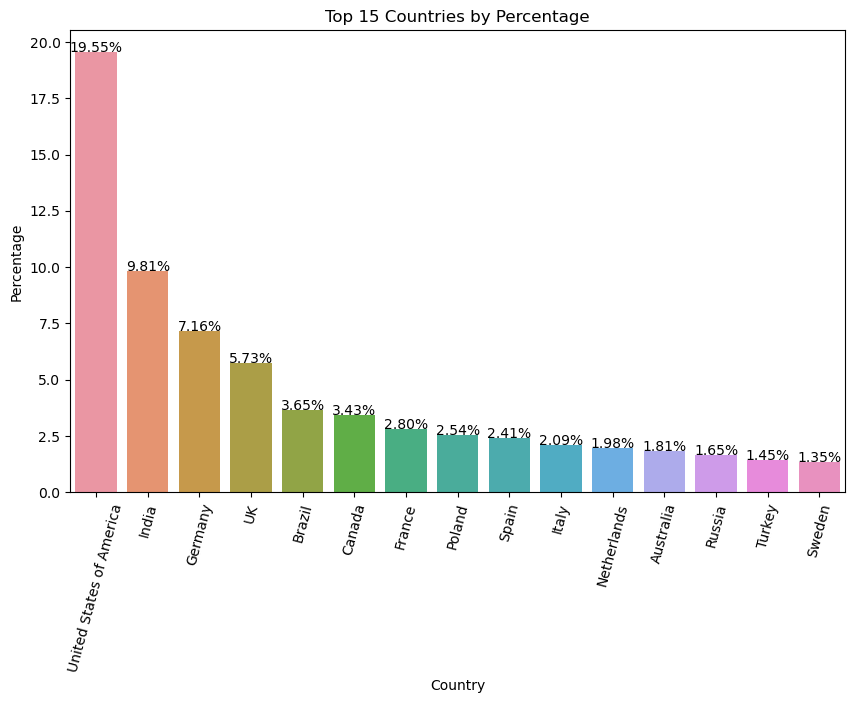

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# set font size
plt.rcParams.update({'font.size': 10})

# set figure size
plt.figure(figsize=(10, 6))

# create the barplot and rotate x-axis labels
sns.barplot(x='Country', y='Percentage', data=top_15_countries)
plt.xticks(rotation=75)

# add value labels to the bars
for index, row in top_15_countries.iterrows():
    plt.text(index, row['Percentage'], '{:.2f}%'.format(row['Percentage']), ha='center')

# set title and axis labels
plt.title("Top 15 Countries by Percentage")
plt.xlabel("Country")
plt.ylabel("Percentage")

# add a grid
#plt.grid(True)

# use a different color palette
# sns.set_palette("husl")

# display the plot
plt.show()


### Categorical Feature &rarr; Gender

Let's check the distribution of respondent's gender.

In [38]:
# copy of survey_df2
gender_df=survey_df2.copy()

# readabilty
gender_df['Gender'] = gender_df['Gender'].replace('Non-binary, genderqueer, or gender non-conforming', 'Non-binary,genderqueer,GNC')

# count the number of occurrences of each gender in the Gender column
gender_counts=gender_df['Gender'].value_counts()
gender_counts

Man                           33612
Woman                          1777
Prefer not to say               327
Non-binary,genderqueer,GNC      283
Or, in your own words:           98
Name: Gender, dtype: int64

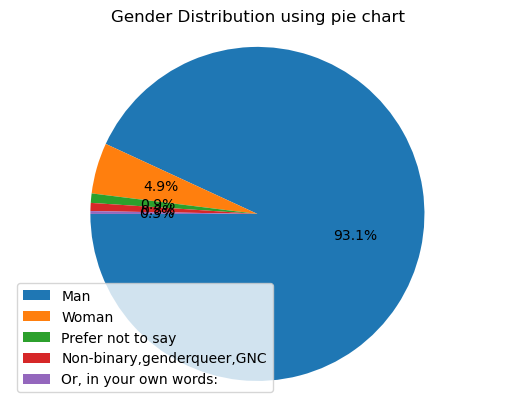

In [39]:
gender_counts = gender_df['Gender'].value_counts()

# index values of the Gender column 
labels = gender_counts.index

# count of each gender
sizes = gender_counts.values

# for pie chart
fig, ax = plt.subplots()
ax.pie(sizes,autopct='%1.1f%%', startangle=180)
ax.axis('equal')

# Legend
plt.legend(labels=labels, loc='best', fontsize=10)

# Title
plt.title('Gender Distribution using pie chart')
plt.rcParams.update({'font.size': 14})
# Show plot
plt.show()

Can summarise that the majority of survey respondents are Man with 93.1 % and women in programming are 4.9 %.The other gender minorities are less than 1%.

### Ordinal Feature &rarr; Edlevel

Let's see respondents Education level.

In [40]:
# copy of survey_df2
education_df=survey_df2.copy()

# improve readbility on graph
education_df.loc[education_df['EdLevel'] == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)', 'EdLevel'] = 'Secondary School'
education_df.loc[education_df['EdLevel'] == 'Some college/university study without earning a degree', 'EdLevel'] = 'Undergrads'

# count the number of occurrences of each education degree in the EdLevel column
education_counts=education_df['EdLevel'].value_counts()
education_counts

Bachelor’s degree (B.A., B.S., B.Eng., etc.)       17638
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)     9232
Undergrads                                          4212
Secondary School                                    1683
Associate degree (A.A., A.S., etc.)                 1164
Other doctoral degree (Ph.D., Ed.D., etc.)          1090
Professional degree (JD, MD, etc.)                   585
Something else                                       359
Primary/elementary school                            214
Name: EdLevel, dtype: int64

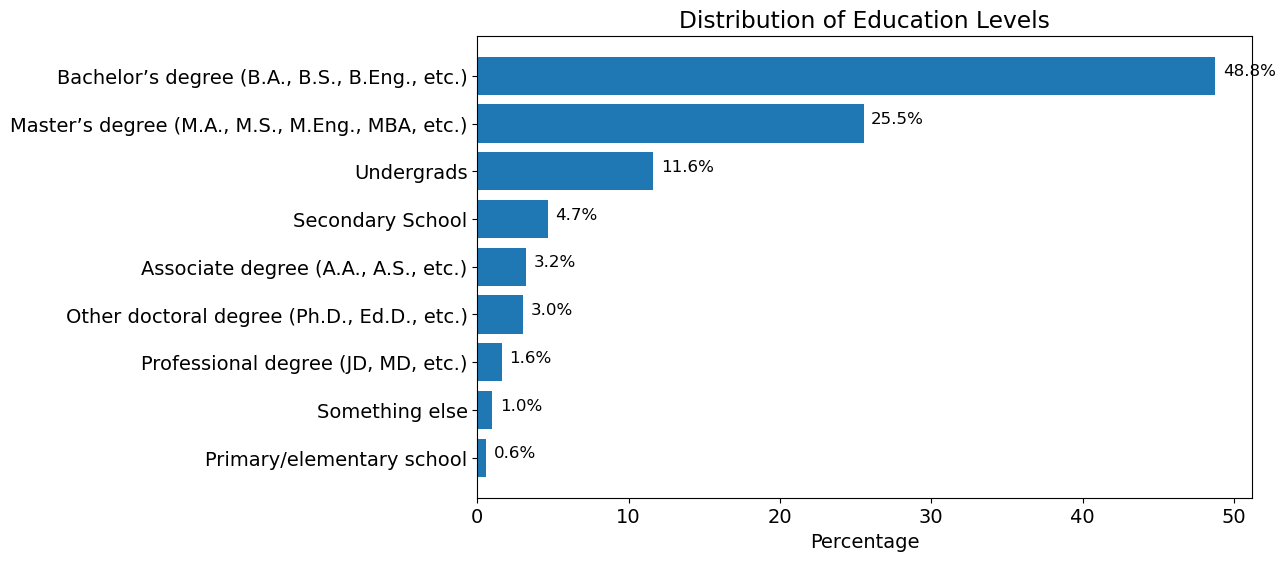

In [41]:
# Calculate percentage
total = sum(education_counts.values)
percentages = [count/total*100 for count in education_counts.values]

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(education_counts.index, percentages)

# Add x-axis label and title
ax.set_xlabel('Percentage')
ax.set_title('Distribution of Education Levels')

# Invert y-axis to show the highest percentage on top
ax.invert_yaxis()

# Display percentage on each bar
for i, v in enumerate(percentages):
    ax.text(v + 0.5, i, f'{v:.1f}%', color='black', fontsize=12)

# Display plot
plt.show()

Almost 50% of respondents own Bachlor's degree and 25% of respondents have Master's degree.Interestingly, respondents with just primary/elementary education level also love to program.

Curious to know education level by gender.

### Distribution of respondents education level by gender

In [42]:
# count the number of occurrences of each degree by gender
counts = education_df.groupby(['EdLevel', 'Gender']).size().unstack()
counts

Gender,Man,"Non-binary, genderqueer, or gender non-conforming","Or, in your own words:",Prefer not to say,Woman
EdLevel,,,,,
"Associate degree (A.A., A.S., etc.)",1085,9,4,14,51
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",16353,122,32,145,936
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",8526,55,26,90,506
"Other doctoral degree (Ph.D., Ed.D., etc.)",996,11,3,17,58
Primary/elementary school,198,4,1,6,2
"Professional degree (JD, MD, etc.)",549,4,2,6,24
Secondary School,1598,20,8,12,43
Something else,329,3,1,5,18
Undergrads,3958,55,21,32,138


In [43]:
import plotly.graph_objects as go

# count the number of occurrences of each degree by gender
counts = education_df.groupby(['EdLevel', 'Gender']).size().unstack()

# create the stacked bar chart
fig = go.Figure(data=[go.Bar(name=gender, x=counts.index, y=counts[gender],hovertemplate='%{y}') for gender in counts.columns])
fig.update_layout(barmode='stack', title='Distribution of respondents education level by gender', xaxis_title='EdLevel', yaxis_title='Count')

# display the chart
fig.show()


Bachelor's degree is the most pursued by all gender type. We see 936 women holds bachelor's degree where as 16,353 men has bachelor's  degree which is approx. 5.73 times.

### Categorical Feature &rarr; Employment

As multiple options were allowed to opt , there are many rows with multiple employment status.To make analysis easier, we need to define function which turns columns with list of values into data frame having columns for each option.

In [44]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [45]:
Employment_df= split_multicolumn(survey_df2.Employment)
Employment_df.loc[50:55]

,"Employed, full-time","Independent contractor, freelancer, or self-employed","Employed, part-time","Student, full-time","Student, part-time","Not employed, but looking for work",I prefer not to say,"Not employed, and not looking for work",Retired
50,True,False,False,False,False,False,False,False,False
51,True,False,False,False,False,False,False,False,False
52,True,False,False,False,False,False,False,False,False
53,True,False,False,False,False,False,False,False,False
54,True,False,False,False,False,False,False,False,False
55,True,True,False,False,False,False,False,False,False


The Employment_df has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is True. Otherwise, it is False.

In [46]:
total_respondents = Employment_df.sum()

#  Calculate the total number of respondents for each category of employment 
Employment_counts=Employment_df.sum().sort_values(ascending=False)

# percentage
total_respondents = Employment_counts.sum()
employment_percentages = (Employment_counts / total_respondents) * 100

In [47]:
employment_counts_per_df=pd.DataFrame({'Employment':Employment_counts.index,'Count':Employment_counts.values,'Percentage':employment_percentages.values})
employment_counts_per_df

,Employment,Count,Percentage
0,"Employed, full-time",33925,81.733202
1,"Independent contractor, freelancer, or self-employed",4707,11.340256
2,"Employed, part-time",1131,2.724842
3,"Student, part-time",908,2.187583
4,"Student, full-time",725,1.746693
5,"Not employed, but looking for work",40,0.096369
6,I prefer not to say,39,0.093960
7,"Not employed, and not looking for work",16,0.038548
8,Retired,16,0.038548


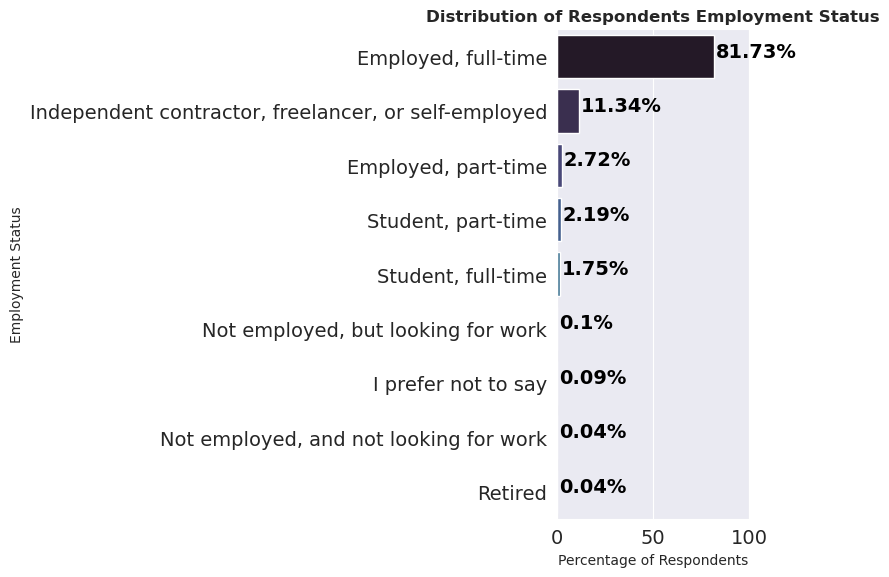

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Employment_counts' is a Pandas Series with the data
total_respondents = Employment_counts.sum()
employment_percentages = Employment_counts.apply(lambda x: (x / total_respondents) * 100)

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))

# Create the barplot
sns.barplot(x=employment_percentages.values, y=employment_percentages.index, palette='mako', ax=ax)

# Set the title and axis labels
ax.set_title('Distribution of Respondents Employment Status', fontsize=12, fontweight='bold')
ax.set_xlabel('Percentage of Respondents', fontsize=10)
ax.set_ylabel('Employment Status', fontsize=10)

# Set x-axis limit to 100
ax.set_xlim(0, 100)

# Add labels to the bars
for i, v in enumerate(employment_percentages.values):
    ax.text(v + 1, i, str(round(v, 2)) + '%', color='black', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


The above bar plot shows that, 81.73 % of respondents are Employed to full-time roles. Interestingly, the survey was taken by programmers having different employment status such as respondents who are part-time employee with 2.72% ,retired respondents 0.04 % and also student both full-time(1.75%) and part-time(2.19%).

We have one more categorical feature to analyze, Developer type. Developer type represents different professional roles of respondents.

### Categorical Feature &rarr; DevType

Few respondents might have different roles in their professional life, for the same reason during the survey the respondents were allowed to opt for multiple roles for which they work for.
Therefore, to make our analysis we need to call the function defined earlier `split_multicolumn()`.

In [49]:
DevType_df= split_multicolumn(survey_df2.DevType)
DevType_df.loc[50:55]

,"Developer, back-end",Engineering manager,"Developer, full-stack","Developer, front-end",Database administrator,Academic researcher,DevOps specialist,"Developer, mobile","Developer, desktop or enterprise applications","Developer, embedded applications or devices",...,"Senior Executive (C-Suite, VP, etc.)",System administrator,Other (please specify):,"Developer, QA or test",Marketing or sales professional,Security professional,Data or business analyst,"Engineer, site reliability",Educator,Blockchain
50,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51,True,False,True,True,True,False,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False
52,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
53,True,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
54,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
55,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [50]:
#counting the total number of occurrences of each unique developer type
DevType_count=DevType_df.sum().sort_values(ascending=False)

# to Calculate the percentage of each value in the DevType_count Series
total_count = DevType_count.sum()
DevType_percentage = DevType_count / total_count * 100
DevType_df1=pd.DataFrame({'Type': DevType_count.index,'Count':DevType_count.values,'Percentage':DevType_percentage.values})
DevType_df1

,Type,Count,Percentage
0,"Developer, full-stack",17649,18.117891
1,"Developer, back-end",16846,17.293557
2,"Developer, front-end",9583,9.837597
3,"Developer, desktop or enterprise applications",5699,5.850409
4,"Developer, mobile",4611,4.733503
5,DevOps specialist,4121,4.230485
6,Cloud infrastructure engineer,3579,3.674085
7,Database administrator,2958,3.036587
8,System administrator,2771,2.844619
9,Engineering manager,2435,2.499692


From the above data frame, we can say that most of the survey respondents are Developers and very less respondents working in marketing or sales has taken the progranmmers survey conducted by stack overflow.

The main reasons behind this could be :
1. As we know many developers use StackOver Flow to solve work related or code realted queries , which also indicates many developers across world have heard about StackOver Flow community.

2. On, the other hand, there is possibitly of marketing or sales or any non-tech professional who codes but they are not aware of community of programmers like StackOver Flow.

We will use 'wordclouds' as a tool to quickly visualize the most common job role of survey respondents.

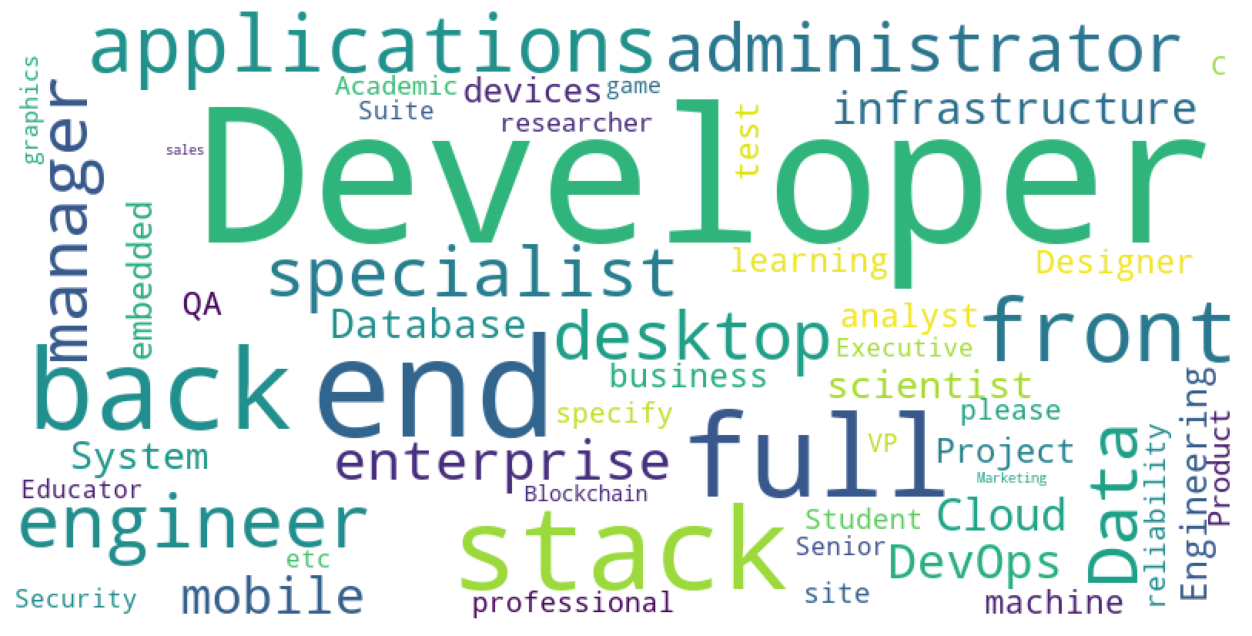

In [51]:
# Import the necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join the 'DevType' column data into a single string and remove semicolons and commas
words = ' '.join((job for job in survey_df2.DevType.dropna().str.replace(';', ' ').str.replace(',', ' ')))

# Generate the WordCloud object with specified parameters
wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='white').generate(words)

# Create a figure and turn off the axis and grid lines for aesthetic purposes
plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)

# Display the WordCloud image
plt.imshow(wc);


The above wordcloud shows the most common profession of respondents , we see Developer as most common word and marketing and sales the least.

### Numerical Feature &rarr; Age

Earliar we dropped rows which failed to satisy condition 'WorkExp < Age', to do so we transformed the age ranges to numeric. But to get some rough idea of respondents age distribution we will be using Age ranges. 

In [52]:
# Age

# group the data by age and count the number of responses in each group
age_counts = survey_df1.groupby('Age')['Age'].count()

# calculate the percentage of responses for each age group
age_percentages = age_counts / survey_df1.shape[0] * 100

# create a new dataframe with the results
age_df = pd.DataFrame({'Age': age_percentages.index, 'count':age_counts.values,'Percentages': age_percentages.values})
age_df

,Age,count,Percentages
0,18-24 years old,16646,22.719332
1,25-34 years old,28112,38.368729
2,35-44 years old,13988,19.091554
3,45-54 years old,5281,7.207785
4,55-64 years old,1978,2.699678
5,65 years or older,554,0.756128
6,Prefer not to say,521,0.711088
7,Under 18 years old,3866,5.276519


The age range to which most of the respondents belong is 25-34 years old with 38.36 %. The least is 65 years or older with 0.76%. 
Let's use a bar plot to visualize the same better.

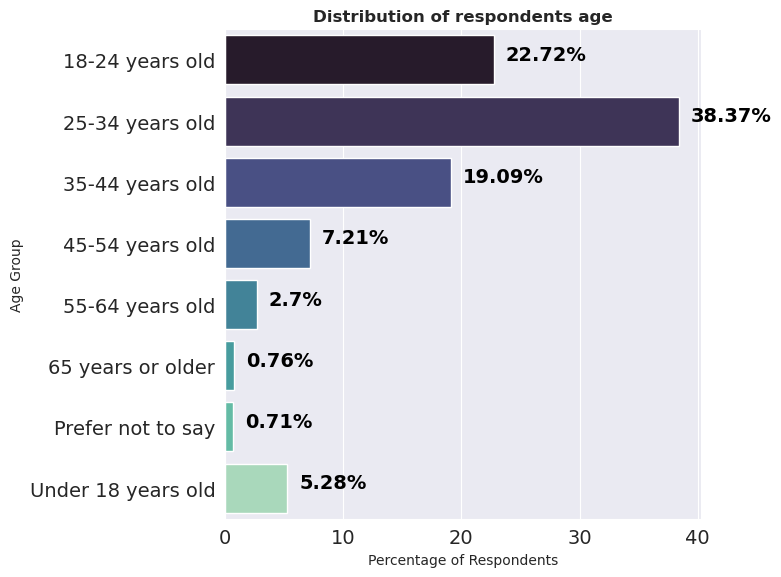

In [53]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))

# Create the barplot
sns.barplot(x=age_df.Percentages, y=age_df.Age, palette='mako', ax=ax)

# Set the title and axis labels
ax.set_title('Distribution of respondents age', fontsize=12, fontweight='bold')
ax.set_xlabel('Percentage of Respondents', fontsize=10)
ax.set_ylabel('Age Group', fontsize=10)

# Add labels to the bars
for i, v in enumerate(age_df.Percentages):
    ax.text(v + 1, i, str(round(v, 2)) + '%', color='black', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

Possible reasons why many respondents are between 18-34 years old :
1. We visualized many of the respondents hold Bachelors degree and an average age of completing Bachelors is between 20-24, and also we also summarized that many of the respondents are work as professional programmers such as Developer. 
As many young professional programmers aged between 18-34 years old who were aware StackOver Flow , has taken the survey. 


In [54]:
import plotly.express as px
dist_title="Distribution of respondent's total years of coding experience excluding education"
fig=px.histogram(survey_df2, x="YearsCodePro", marginal="box",color_discrete_sequence=['Red'], title=dist_title)
fig.update_layout(bargap=0.1)

The large percentage of respondents have 1-10 years of Professional coding experience. This shows respondents who just started with their coding journey tend to reach out developer community one such is StackOver flow.

We just explored individual columns of the dataset and gained several insights about the respondents.We will now ask questions and try to answer it using data frame operations and visualizations.


### Asking and Answering Questions

#### 1. What percentage of respondents by gender has coding as hobby?

There is no separate column stating hobby, but we will create a new `column 'Hobby'`. For everytime when word 'Hobby' appears in ``CodingActivities`` column ,the new 'Hobby' column will have `yes` value for that row else `no`.

In [55]:
survey_df2['CodingActivities']

0                                            I don’t code outside of work
1        Hobby;Contribute to open-source projects;Freelance/contract work
2                                                                   Hobby
3                                                                   Hobby
4                                           Hobby;Freelance/contract work
                                       ...                               
36478                                             School or academic work
36479                                                               Hobby
36480                                             Freelance/contract work
36481                                                               Hobby
36482                                       Hobby;School or academic work
Name: CodingActivities, Length: 36483, dtype: object

Before we try to find out the percentage of respondents by gender has coding as hobby, we will explore `how many respondents have coding as hobby?`

In [56]:
# create a new column 'Hobby' based on 'CodingActivities'
survey_df2['Hobby'] = survey_df2['CodingActivities'].fillna('').apply(lambda x: 'Yes' if 'Hobby' in x else 'No')

# copy of survey_df2
Gender_Hobby_df=survey_df2.copy()

# improve readbility on graph
Gender_Hobby_df.loc[Gender_Hobby_df['Gender'] == 'Non-binary, genderqueer, or gender non-conforming', 'Gender'] = 'Non-binary,genderqueer,GNC'

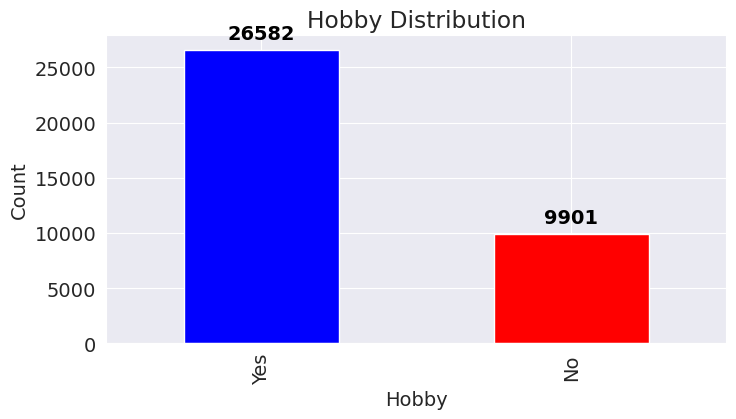

In [57]:
import matplotlib.pyplot as plt

# Set the colors for the bars
colors = ['blue', 'red']

# Create a bar plot
fig, ax = plt.subplots()
counts = Gender_Hobby_df['Hobby'].value_counts()
counts.plot(kind='bar', ax=ax, color=colors)

# Set the plot title and axis labels
ax.set_title('Hobby Distribution')
ax.set_xlabel('Hobby')
ax.set_ylabel('Count')

# Add the count values on top of the bars
for i, v in enumerate(counts):
    ax.text(i, v+1000, str(v), color='black', fontweight='bold', ha='center')

# Set the figure size
fig.set_size_inches(8, 4)

# Display the plot
plt.show()


The `Yes` for coding as hobby is  2.6838 times greater than `No`, which means almost many respondents do not code outside their work, these respondents do coding for their part-time, or full-time or student or freelance.

In [58]:
counts_Gh = Gender_Hobby_df.groupby(['Gender', 'Hobby']).size().unstack()
total_count = counts_Gh.sum().sum()

# calculate the percentage values for each category
counts_Gh_pct = counts_Gh.apply(lambda x: x / total_count * 100)

# combine the output into one dataframe
counts_Gh_pct_df = pd.concat([counts_Gh, counts_Gh_pct], keys=['count', 'percentage'], axis=1)
counts_Gh_pct_df

count        percentage           
Hobby                         No    Yes         No        Yes
Gender                                                       
Man                         8629  24983  23.905034  69.210738
Non-binary,genderqueer,GNC    70    213   0.193922   0.590077
Or, in your own words:        21     77   0.058177   0.213314
Prefer not to say             96    231   0.265950   0.639942
Woman                        779    998   2.158074   2.764773

About 69.2% men has codding as hobby while women and other minority gender stands with less percentage for coding as hobby.

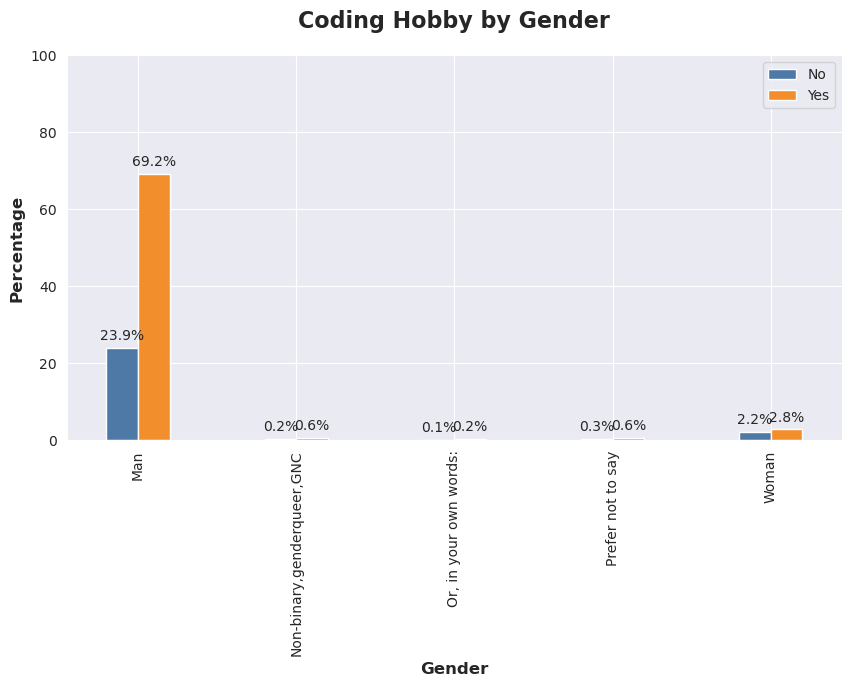

In [59]:
import matplotlib.pyplot as plt

# create a side-by-side bar chart
fig, ax = plt.subplots(figsize=(10, 5))
counts_Gh_pct.plot(kind='bar', ax=ax, width=0.4, color=['#4e79a7', '#f28e2b'])

# add labels and title
ax.set_xlabel('Gender', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage', fontsize=12, fontweight='bold')
ax.set_title('Coding Hobby by Gender', fontsize=16, fontweight='bold', pad=20)

# set the y-axis limit to 100
ax.set_ylim([0, 100])

# add percentage labels on the bars
for c in ax.containers:
    ax.bar_label(c, label_type='edge', labels=[f"{val:.1f}%" for val in c.datavalues], fontsize=10, padding=4)

# remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# add horizontal grid lines
ax.yaxis.grid(True)

# increase tick font size
ax.tick_params(axis='both', which='major', labelsize=10)

# add legend
ax.legend(['No', 'Yes'], loc='upper right', fontsize=10)

# show the plot
plt.show()


### 2. Top 15 countries where respondents have coding as a Hobby?

In [60]:
# copy of survey_df2
Country_Hobby_df=Gender_Hobby_df.copy()
Country_Hobby_df[['Country','Hobby']]

Column Names,Country,Hobby
0,Netherlands,No
1,United States of America,Yes
2,United States of America,Yes
3,Australia,Yes
4,United States of America,Yes
...,...,...
36478,Belgium,No
36479,France,Yes
36480,Nigeria,No
36481,United States of America,Yes


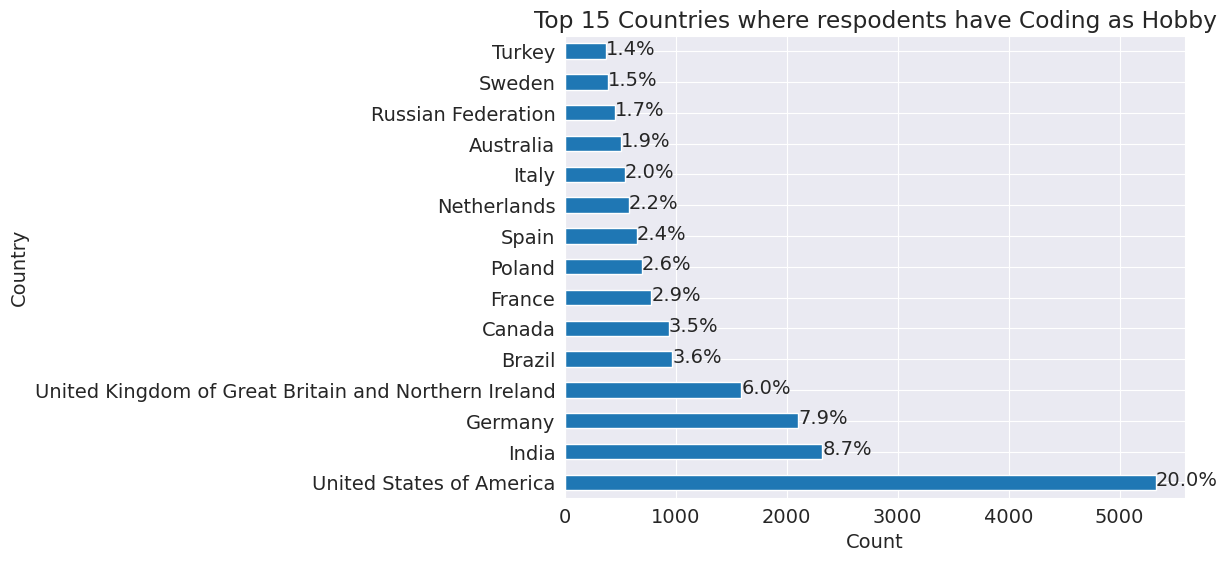

In [61]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'Country' and count the 'Hobby' values
hobby_counts = Country_Hobby_df.groupby('Country')['Hobby'].value_counts()

# Filter for the 'Yes' values of the 'Hobby' column
hobby_counts = hobby_counts.loc[hobby_counts.index.get_level_values('Hobby') == 'Yes']

# Get the counts for each country and sort in descending order
counts = hobby_counts.groupby('Country').sum().sort_values(ascending=False)[:15]

# Calculate the total count of 'Yes' values
total_count = hobby_counts.sum()

# Calculate the percentage value for each bar
percentages = counts / total_count * 100

# Create a horizontal bar plot
fig, ax = plt.subplots()
counts.plot(kind='barh', ax=ax)

# Loop through the bars and annotate the percentage value
for i, v in enumerate(counts):
    ax.annotate('{:.1f}%'.format(percentages[i]), xy=(v+0.5, i-0.1))

# Set the plot title and axis labels
ax.set_title('Top 15 Countries where respodents have Coding as Hobby')
ax.set_xlabel('Count')
ax.set_ylabel('Country')

# to set the figure size
fig.set_size_inches(8, 6)

# Display the plot
plt.show()


20.0% of total respondents whose hobby is to code belongs from `United States of America` and the second country is `India` with 8.7% where respondents have coding as a hobby.

#### 3. What were the popular programming languages in 2022?

We all know technologies change rapidly and some of the technologies become favorites or most sought technologies among programmers and also in corporate.
That's why it is interesting to know which language among the survey respondents made its place in top 25.

In [62]:
survey_df2.LanguageHaveWorkedWith

0                                                              NaN
1                C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL
2                             C;HTML/CSS;Rust;SQL;Swift;TypeScript
3            Elixir;Erlang;HTML/CSS;JavaScript;Ruby;SQL;TypeScript
4                      HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala
                                   ...                            
36478                                                           C#
36479    Bash/Shell;HTML/CSS;Java;JavaScript;Python;SQL;TypeScript
36480         Bash/Shell;Dart;JavaScript;PHP;Python;SQL;TypeScript
36481                    Bash/Shell;HTML/CSS;JavaScript;Python;SQL
36482                           HTML/CSS;JavaScript;PHP;Python;SQL
Name: LanguageHaveWorkedWith, Length: 36483, dtype: object

As respondents worked with multiple languages and they opted all those languages on which they worked, therefore to make our analysis easier we will use the function `split_multicolumn()`.

In [63]:
survey_df2.LanguageHaveWorkedWith

0                                                              NaN
1                C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL
2                             C;HTML/CSS;Rust;SQL;Swift;TypeScript
3            Elixir;Erlang;HTML/CSS;JavaScript;Ruby;SQL;TypeScript
4                      HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala
                                   ...                            
36478                                                           C#
36479    Bash/Shell;HTML/CSS;Java;JavaScript;Python;SQL;TypeScript
36480         Bash/Shell;Dart;JavaScript;PHP;Python;SQL;TypeScript
36481                    Bash/Shell;HTML/CSS;JavaScript;Python;SQL
36482                           HTML/CSS;JavaScript;PHP;Python;SQL
Name: LanguageHaveWorkedWith, Length: 36483, dtype: object

In [64]:
languages_workedwith_df = split_multicolumn(survey_df2.LanguageHaveWorkedWith)

In [65]:
languages_worked_count = languages_workedwith_df.sum().sort_values(ascending=False)
languages_worked_percentages = languages_workedwith_df.mean().sort_values(ascending=False) * 100

In [66]:
LanguagesWorkedWith_df = pd.DataFrame({ 'Language':languages_worked_percentages.index,'Count':languages_worked_count.values,'Percentage':languages_worked_percentages.values})
# top 25 languages
top25_LanguagesWorkedWith=LanguagesWorkedWith_df.head(25)
top25_LanguagesWorkedWith

,Language,Count,Percentage
0,JavaScript,24064,65.959488
1,HTML/CSS,19548,53.581120
2,SQL,19413,53.211085
3,Python,15750,43.170792
4,TypeScript,14192,38.900310
5,Java,11602,31.801113
6,Bash/Shell,10903,29.885152
7,C#,10703,29.336951
8,PHP,7388,20.250528
9,C++,6408,17.564345


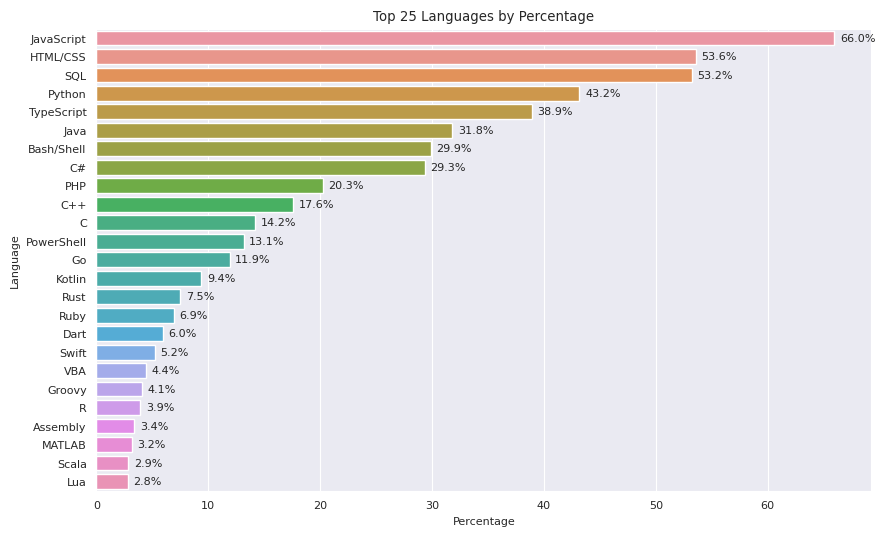

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# set font size
plt.rcParams.update({'font.size': 8})

# set figure size
plt.figure(figsize=(10, 6))

# create the horizontal barplot
sns.barplot(x='Percentage', y='Language', data=top25_LanguagesWorkedWith)

# add value labels to the bars
for index, row in top25_LanguagesWorkedWith.iterrows():
    plt.text(row['Percentage']+0.5, index, '{:.1f}%'.format(row['Percentage']), va='center')

# set title and axis labels
plt.title("Top 25 Languages by Percentage")
plt.xlabel("Percentage")
plt.ylabel("Language")

# use a different color palette
sns.set_palette("husl")

# add a grid
sns.set_style('whitegrid')

# display the plot
plt.show()


About 66 % of total respondents worked with Javascript, making it most popular language of the year 2022. The second is HTML/CSS  at 53.6%.
The possible reasons for Javascript and HTML/CSS popularity could  be because:
1. Our major respondents are Developers, and developers majorly work with Javascript and HTML/CSS languages.

### 4. Which languages people want to work with over in over the next year ? 

With technologies advancing rapidly to simplify problems, programmers adopt to new languages or have eagerness to learn new languages.Therefore, it is interesting to know which languages respondents want to work with in the next few years.

In [68]:
languages_interested_df = split_multicolumn(survey_df2.LanguageWantToWorkWith)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

LanguagesWanttoWorkWith_df = pd.DataFrame({ 'Language':languages_interested_percentages.index,'Percentage':languages_interested_percentages.values})
# top 25 languages
top25_LanguagesWantToWorkWith=LanguagesWanttoWorkWith_df.head(25)
top25_LanguagesWantToWorkWith

,Language,Percentage
0,JavaScript,44.609818
1,TypeScript,39.889812
2,Python,39.303237
3,SQL,37.118658
4,HTML/CSS,35.005345
5,Go,24.436039
6,Rust,23.416386
7,C#,23.007976
8,Bash/Shell,18.836170
9,Java,18.035797


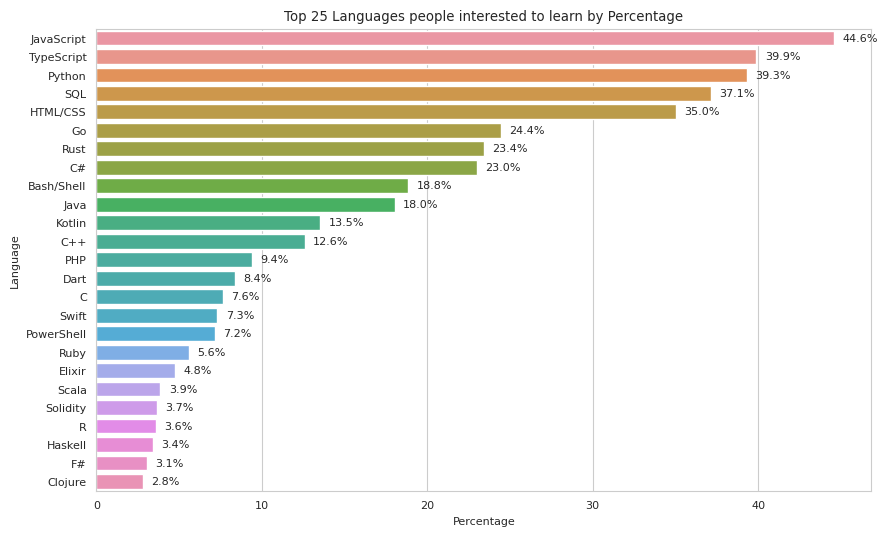

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# set font size
plt.rcParams.update({'font.size': 8})

# set figure size
plt.figure(figsize=(10, 6))

# create the horizontal barplot
sns.barplot(x='Percentage', y='Language', data=top25_LanguagesWantToWorkWith)

# add value labels to the bars
for index, row in top25_LanguagesWantToWorkWith.iterrows():
    plt.text(row['Percentage']+0.5, index, '{:.1f}%'.format(row['Percentage']), va='center')

# set title and axis labels
plt.title("Top 25 Languages people interested to learn by Percentage")
plt.xlabel("Percentage")
plt.ylabel("Language")

# use a different color palette
sns.set_palette("husl")

# add a grid
sns.set_style('whitegrid')

# display the plot
plt.show()


JavaScript with 44.6% tops the list of languages respondents would like to learn over the next year, followed by TypesSript at 39.9% and python with 39.3%.
The possible reasons for JavaScript to be most sought language could be :
1. Web applications rise and user-interfaces need.
2. It is versatile language can be used for both front and backend development.
3. High demand for JavaScript developers in the job market.

The possible reasons for TypeScript to be most sought language could be :
1. TypeScript is superset of JavaScript, it helps save lot of debugging time with its optional static typing.
2. Maintaining codebase, working with larger codebase and bug reductions.
3. Easier for developers to migrate existing JavaScript to TypeScript or use use TypeScript code in existing JavaScript projects.
4. Growing Typscript community.

The possible reasons for Python to be on the race of most sought language is :
1. Easy to learn : It is even known as beginner's language because of its clean syntax which is easy to read,write and understand.
2. Versatility : wide range of tasks, including web development, scientific computing, data analysis, artificial intelligence, and machine learning.
3. Open-source language 
4. Job demand

### 5. Which languages are the most  liked among respondents ?

Now, the time has come to know which language tops the list of languages on which respondnets worked with and would like to learn more about it. Which means we will explore the most loved languages.

In [70]:
languages_like_df = languages_workedwith_df & languages_interested_df

languages_liked_percentages = (languages_like_df.sum() * 100/ languages_workedwith_df.sum()).sort_values(ascending=False)

Languages_liked_df = pd.DataFrame({ 'Language':languages_liked_percentages.index,'Percentage':languages_liked_percentages.values})

#top 25 languages
top25_languages_liked_percentages=Languages_liked_df.head(25)

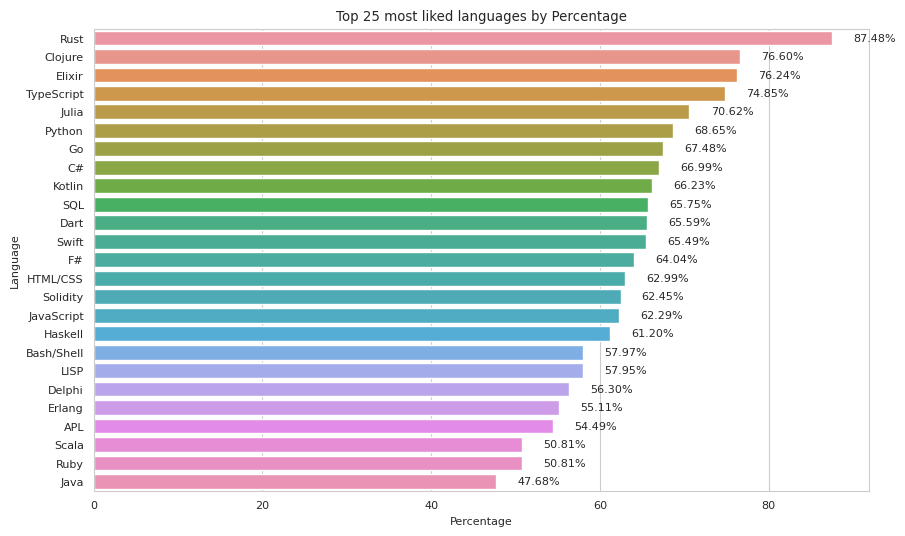

In [71]:
# set font size
plt.rcParams.update({'font.size': 8})

# set figure size
plt.figure(figsize=(10, 6))

# create the horizontal barplot
sns.barplot(x='Percentage', y='Language',data=top25_languages_liked_percentages)

# add value labels to the bars
for index, row in top25_languages_liked_percentages.iterrows():
    plt.text(row['Percentage']+2.5, index, '{:.2f}%'.format(row['Percentage']), va='center')
    
# set title and axis labels
plt.title("Top 25 most liked languages by Percentage")
plt.xlabel("Percentage")
plt.ylabel("Language");

It's so amusing to see that neither JavaScript,HTML/CSS,Python or TypeScript make to Top 3 in the list of most loved language.
Reasons for Rust, Clojure and Elixir to be on top 3 :

#### Rust :
1. Performance of Rust ,known to outperform languages like Python and JavaScript.
2. Considered systems programming safer choice.
3. Moddern language with features like pattern matching, closures, and traits that make it easier to write clean and maintainable code.
4. can be compiled to run on a wide variety of platforms, makes Rust best choice for developing cross-platform applications.

#### Clojure :
1. easy to integrate Clojure with existing Java systems and allows one to take advantage of Java's ecosystem.
2. Simple syntax
3. It is functional programming language, the approach that leads to more concise and readable code, therefore fewer errors and bugs.

#### Elixir :
1. Elixir is designed for high concurrency and fault-tolerance.
2. It's processes and message-passing model enables easy to write scalable and fault-tolerant applications.
3. With Elixir it is faster and easier to write code than other languages.
4. Elixir's Phoenix web framework makes building web applications easy which can handle high traffic and support real-time communication.


### 5. Which langauges are preferred by type of companies ? 

In [72]:
survey_df2[['LanguageHaveWorkedWith','OrgSize']]

Column Names,LanguageHaveWorkedWith,OrgSize
0,NaN,I don’t know
1,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL,20 to 99 employees
2,C;HTML/CSS;Rust;SQL;Swift;TypeScript,2 to 9 employees
3,Elixir;Erlang;HTML/CSS;JavaScript;Ruby;SQL;TypeScript,20 to 99 employees
4,HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala,"5,000 to 9,999 employees"
...,...,...
36478,C#,NaN
36479,Bash/Shell;HTML/CSS;Java;JavaScript;Python;SQL;TypeScript,"10,000 or more employees"
36480,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;TypeScript,100 to 499 employees
36481,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,I don’t know


<Figure size 1000x600 with 0 Axes>

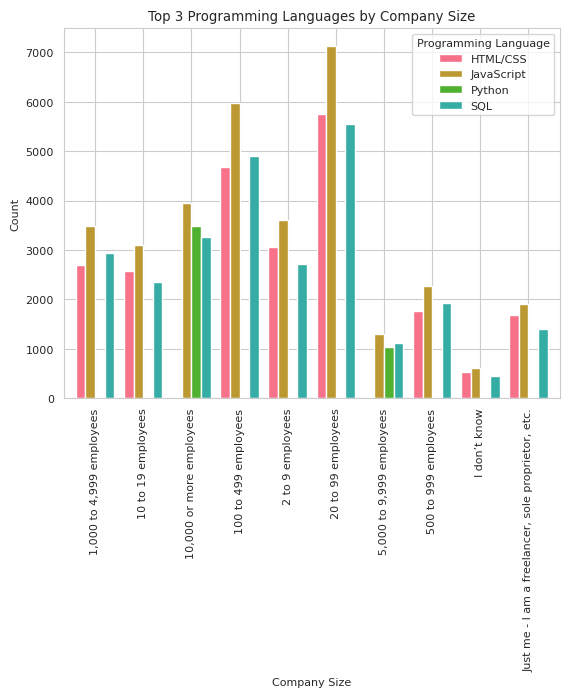

In [73]:
import matplotlib.pyplot as plt

# Group the programming languages by company size and get the top 3 languages
grouped = survey_df.groupby('OrgSize')['LanguageHaveWorkedWith'].apply(lambda x: x.str.split(';').explode().value_counts().head(3))

# Plotting the bar chart
plt.figure(figsize=(10, 6))
grouped.unstack().plot(kind='bar', width=0.8)
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.title('Top 3 Programming Languages by Company Size')
plt.legend(title='Programming Language')
plt.show()


#### Summarize :
1. The companies which employee size < 5,000: use both HTML/CSS and JavaScript languages, but they don't use Python.
######  Reasons could be : 
 * HTML, CSS, and JavaScript are majorly used for building the front-end of websites and web applications, though Python can be used for web-development but they are best suited for back-end development.


2. The companies which have larger employee size : 5,000 to 9,999 employees and 10,000 or more employees have Python as their second best language after JavaScript.
##### Reasons could be :
 * As, we know that JavaScript, client-side scripting language that is built into all modern web browsers, which can be used without any special tools or software.
 * Python, on the other hand, commonly used for back-end development, data science, machine learning, scientific computing, and automation.
This means the these companies are trying to stay ahead or advance themselves in the field of new age technologies.

### 6. How respondents are learning to code?

In [74]:
# survey question asked
schema_df1.LearnCode

'How did you learn to code? Select all that apply.'

In [75]:
survey_df2.LearnCode.head(5)

0                                                                                On the job training;Coding Bootcamp
1                                                                Other online resources (e.g., videos, blogs, forum)
2                                                                            School (i.e., University, College, etc)
3                                                     Books / Physical media;School (i.e., University, College, etc)
4    Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);On the job training
Name: LearnCode, dtype: object

As this survey questions welcomed multiple choices, respondents mentioned they used various sources to learn code.

In [76]:
survey_df2['LearnCode']
learn_code_df = split_multicolumn(survey_df2.LearnCode)
learn_code_df

,On the job training,Coding Bootcamp,"Other online resources (e.g., videos, blogs, forum)","School (i.e., University, College, etc)",Books / Physical media,Other (please specify):,Online Courses or Certification,Colleague,Friend or family member,Hackathons (virtual or in-person)
0,True,True,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,False,False,False,False,False
4,True,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
36478,False,False,False,True,False,False,False,False,False,False
36479,False,False,True,True,True,False,True,False,False,False
36480,True,False,True,False,True,False,True,False,False,False
36481,True,False,True,True,False,False,True,False,False,False


In [77]:
learnCode_percentages = learn_code_df.mean().sort_values(ascending=False) * 100

LearnCode_percentages_df = pd.DataFrame({ 'From':learnCode_percentages.index,'Percentages':learnCode_percentages.values})
LearnCode_percentages_df

,From,Percentages
0,"Other online resources (e.g., videos, blogs, forum)",69.613245
1,"School (i.e., University, College, etc)",65.079626
2,Books / Physical media,57.665214
3,Online Courses or Certification,48.458186
4,On the job training,48.044295
5,Colleague,21.568950
6,Friend or family member,13.455582
7,Coding Bootcamp,10.900968
8,Hackathons (virtual or in-person),7.883124
9,Other (please specify):,4.407532


Visualize the above data frame with barplot.

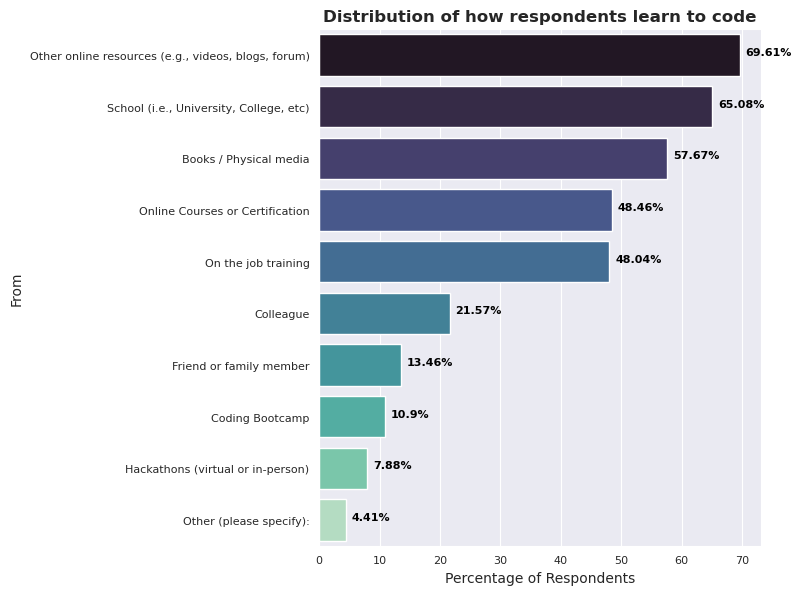

In [78]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))

# Create the barplot
sns.barplot(x=LearnCode_percentages_df.Percentages, y=LearnCode_percentages_df.From, palette='mako', ax=ax)

# Set the title and axis labels
ax.set_title('Distribution of how respondents learn to code', fontsize=12, fontweight='bold')
ax.set_xlabel('Percentage of Respondents', fontsize=10)
ax.set_ylabel('From', fontsize=10)

# Add labels to the bars
for i, v in enumerate(LearnCode_percentages_df.Percentages):
    ax.text(v + 1, i, str(round(v, 2)) + '%', color='black', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

The above barplot shows about 69.61 % of the total respondents learn to code from online sources such as videos,blogs etc.
Probably the free sources which are abundance with respect to the growth of WorldWideWeb.

### 7. Which top 3 languages are used among top 15 countries in survey ?

In [79]:
Country_Language=survey_df2[['Country','LanguageHaveWorkedWith']]
Country_Language

Column Names,Country,LanguageHaveWorkedWith
0,Netherlands,NaN
1,United States of America,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL
2,United States of America,C;HTML/CSS;Rust;SQL;Swift;TypeScript
3,Australia,Elixir;Erlang;HTML/CSS;JavaScript;Ruby;SQL;TypeScript
4,United States of America,HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala
...,...,...
36478,Belgium,C#
36479,France,Bash/Shell;HTML/CSS;Java;JavaScript;Python;SQL;TypeScript
36480,Nigeria,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;TypeScript
36481,United States of America,Bash/Shell;HTML/CSS;JavaScript;Python;SQL


In [80]:
Country_Language_df = survey_df2[['Country','LanguageHaveWorkedWith']]
Country_Language = pd.concat([Country_Language_df['Country'], Country_Language_df['LanguageHaveWorkedWith'].str.get_dummies(sep=';')], axis=1)
print(Country_Language)

                        Country  APL  Assembly  Bash/Shell  C  C#  C++  COBOL  \
0                   Netherlands    0         0           0  0   0    0      0   
1      United States of America    0         0           0  0   1    0      0   
2      United States of America    0         0           0  1   0    0      0   
3                     Australia    0         0           0  0   0    0      0   
4      United States of America    0         0           0  0   0    0      0   
...                         ...  ...       ...         ... ..  ..  ...    ...   
36478                   Belgium    0         0           0  0   1    0      0   
36479                    France    0         0           1  0   0    0      0   
36480                   Nigeria    0         0           1  0   0    0      0   
36481  United States of America    0         0           1  0   0    0      0   
36482  United States of America    0         0           0  0   0    0      0   

       Clojure  Crystal  ..

In [81]:
# Get the top 15 countries by number of respondents
top_countries = Country_Language['Country'].value_counts().head(15).index

# Create a dictionary to store the top three languages for each country
top_languages = {}

# Loop over each country and get the top three languages
for country in top_countries:
    languages = Country_Language[Country_Language['Country'] == country].iloc[:, 1:].sum().sort_values(ascending=False)[:3]
    top_languages[country] = list(languages.index)

# create a list of dictionaries to store the data
data = []

# loop over each country and add its top three languages to the list
for country, languages in top_languages.items():
    data.append({'Country': country,'Top Language 1': languages[0], 'Top Language 2': languages[1], 'Top Language 3': languages[2]})

# create a new DataFrame from the data
df = pd.DataFrame(data)


In [82]:
developers_count=Country_Language['Country'].value_counts().head(15)
developers_count_df=pd.DataFrame({'Country':developers_count.index,'Developer_Count':developers_count.values})
#concat
df_merged = pd.merge(df, developers_count_df, on='Country')
df_merged

,Country,Top Language 1,Top Language 2,Top Language 3,Developer_Count
0,United States of America,JavaScript,SQL,HTML/CSS,7077
1,India,JavaScript,HTML/CSS,SQL,3553
2,Germany,JavaScript,HTML/CSS,SQL,2593
3,United Kingdom of Great Britain and Northern Ireland,JavaScript,HTML/CSS,SQL,2075
4,Brazil,JavaScript,SQL,HTML/CSS,1323
5,Canada,JavaScript,SQL,HTML/CSS,1241
6,France,JavaScript,HTML/CSS,SQL,1014
7,Poland,JavaScript,SQL,HTML/CSS,920
8,Spain,JavaScript,SQL,HTML/CSS,872
9,Italy,JavaScript,SQL,HTML/CSS,756


The above data frame represents top 15 countries with their top 3 languages and the number of developers working in the field.
Majorily used programming language is JavaScript followed by SQL and HTML/CSS.

The table can help companies operating globally who want to target specific countires for their products or services launch.
For example, companies like ebay, LinkedIn, Airbnb and Instagram planning to launch produt which requires JavaScript expertise,
they can consider countries like United States,India,Germany or even UK as a good target because these countries have significant number of developers who are proficient in JavaScript.

The top three languages in United States of America is : JavaScript,SQL,HTML/CSS, but in India SQL is in the third place.
No countries have Python in their top 3 languages list except Russian Federation country.
Reasons could be :
1. Legacy System: Countries may be find it difficult to switch to Python because of existing systems and infrastructure that are built on different programming language.
2. Industry : Some Industries give preferences to security and performance while some industries prioritize programmming languages that are better suited for machine learning or data analysis tasks etc.

### 7. What is the attitude of respondents towards Blockchain ?

In [83]:
schema_df1['Blockchain']

'How favorable are you about blockchain, crypto, and decentralization?'

In [84]:
survey_df2['Blockchain'].head(5)

0    Very unfavorable
1         Unfavorable
2           Favorable
3    Very unfavorable
4         Indifferent
Name: Blockchain, dtype: object

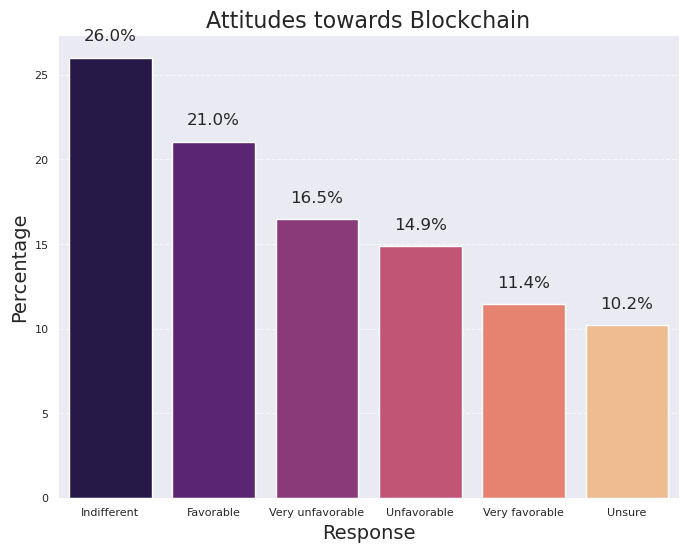

In [85]:

# Calculate the percentage of each response option
counts = survey_df2['Blockchain'].value_counts(normalize=True) * 100

# Create a bar chart with percentages
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index, y=counts.values, palette='magma')

# Set the title and labels for the axes
plt.title('Attitudes towards Blockchain', fontsize=16)
plt.xlabel('Response', fontsize=14)
plt.ylabel('Percentage', fontsize=14)

# Display the percentages on the bars
for i, v in enumerate(counts.values):
    plt.text(i, v + 1, str(round(v, 1)) + '%', ha='center', fontsize=12)

# Add grid lines and remove spines
sns.set_style('ticks')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True)

# Show the plot
plt.show()



- Indifferent : 26 % of respondents have indifferent attitude towards blockchain, this could be because either they are not familiar with the technology or they see no potential impact of it on the lives.
- Favourable : 21 % of respondents have favourable attitude towards blockchain ,which indicates they consider technology as potential benefits or oppurtunities.
- Very unfavorable: 16.5 % of respondents have a very unfavorable attitude towards blockchain, which shows they may have concerns or reservations about the technology.
- Unfavorable: 14.9 % of respondents have an unfavorable attitude towards blockchain.Shows us that some respondents may have a slightly negative view of blockchain, but not to the extent of being very unfavorable.
- Very favorable: 11.4 % of respondents had a very favorable attitude towards blockchain, which is a lower percentage than the very unfavorable responses.Indicates that there are fewer respondents who are very enthusiastic about blockchain compared to those who are very skeptical.
- Unsure: Finally, about 10% of respondents were unsure about their attitude towards blockchain.Indicates that some respondents may not have sufficient knowledge or experience with the technology to form a clear opinion about it.

Overall, we see mixed responses towards blockchain, responses showing relatively high percentage of indifferent responses and a range of attitudes from very unfavorable to very favorable. 
Highlighting the need for advance education and awareness about blockchain and its applications.

### 8. Any mental health disorders among programmers ?

It is crucial to also learn about mental health of the programmers because they often work in high-stress environments, long hours and tight deadlines. Whcih can lead to burnout, anxiety, depression, and other mental health problems.
When struggling with mental health issues, the ability to focus, be creative, and work effectively are impacted. This can lead to delays in projects, mistakes, and lower quality work.

In [86]:
survey_df['MentalHealth'].head(10)

0                                                                                                          NaN
1                                                                                                          NaN
2    I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.);I have an anxiety disorder
3                                                                                            None of the above
4                                                                                                          NaN
5                                                                                       Or, in your own words:
6                                                                                            None of the above
7                                                                                            None of the above
8                                                                                       Or, in your own words:
9

In [87]:
# Create a list of all the unique responses in the "MentalHealth" column
all_responses = survey_df['MentalHealth'].dropna().str.split(';').explode().str.strip().unique()
all_responses

array(['I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)',
       'I have an anxiety disorder', 'None of the above',
       'Or, in your own words:',
       'I have a concentration and/or memory disorder (e.g., ADHD, etc.)',
       'I have learning differences (e.g., Dyslexic, Dyslexia, etc.)',
       "I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)",
       'Prefer not to say'], dtype=object)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



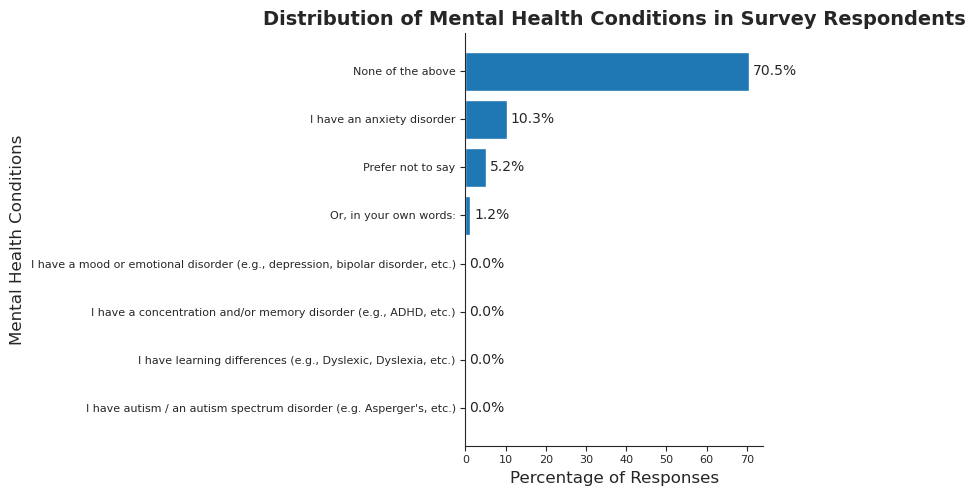

In [88]:
# Create a list of all the unique responses in the "MentalHealth" column
all_responses = survey_df['MentalHealth'].dropna().str.split(';').explode().str.strip().unique()

# Count the number of occurrences of each response
response_counts = {}
total_responses = survey_df['MentalHealth'].dropna().shape[0]
for response in all_responses:
    response_counts[response] = survey_df['MentalHealth'].str.contains(response).sum() / total_responses * 100

# Sort the responses by frequency
sorted_responses = sorted(response_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the labels and values for the plot
labels = [response[0] for response in sorted_responses]
values = [response[1] for response in sorted_responses]

# Plot the data using a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(labels, values, color='#1f77b4')
ax.set_xlabel('Percentage of Responses', fontsize=12)
ax.set_ylabel('Mental Health Conditions', fontsize=12)
ax.set_title('Distribution of Mental Health Conditions in Survey Respondents', fontsize=14, fontweight='bold')
ax.invert_yaxis()

# Display percentages on the bars
for i, v in enumerate(values):
    ax.text(v + 1, i, f"{v:.1f}%", ha='left', va='center', fontsize=10)

# Remove the borders on the top and right sides of the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a grid and customize its appearance
ax.grid(axis='x', linestyle='--', alpha=0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(False)

plt.tight_layout()
plt.show()


Majority of the respondents about 70.5 % have no mental health conditions.Only 10.3 % of respondents have anxiety disorder.

### 8. Is it important to start young to build a career in programming ?

In [89]:
survey_df1[['Age','YearsCodePro']].head(5)

Column Names,Age,YearsCodePro
0,NaN,NaN
1,NaN,NaN
2,25-34 years old,5.0
3,35-44 years old,17.0
4,25-34 years old,3.0


In [90]:
# copy od survey_df1
age_yearscodepro_df=survey_df1.copy() 

# create a new column 'Hobby' based on 'CodingActivities'
age_yearscodepro_df['Hobby'] = age_yearscodepro_df['CodingActivities'].fillna('').apply(lambda x: 'Yes' if 'Hobby' in x else 'No')
age_yearscodepro_df.columns

Index(['EdLevel', 'Country', 'Age', 'Gender', 'Ethnicity', 'MainBranch',
       'CodingActivities', 'LearnCode', 'YearsCode', 'YearsCodePro',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'WorkExp',
       'Employment', 'DevType', 'OrgSize', 'Blockchain', 'MentalHealth',
       'TimeSearching', 'TimeAnswering', 'Hobby'],
      dtype='object', name='Column Names')

In [91]:
# to drop null values
age_yearscodepro_df.dropna(subset=['Age','YearsCodePro','Hobby'], inplace=True)
age_yearscodepro_df[['Age','YearsCodePro','Hobby']].head(5)

Column Names,Age,YearsCodePro,Hobby
2,25-34 years old,5.0,Yes
3,35-44 years old,17.0,No
4,25-34 years old,3.0,Yes
8,25-34 years old,6.0,No
9,45-54 years old,30.0,Yes


In [92]:
import random
import numpy as np

# Define a function to convert age range to a numeric value
def convert_age_range_to_num(age_range):
    if age_range == 'Under 18 years old':
        return random.randint(13,18) # let's keep minimum age 13
    elif age_range == '18-24 years old':
        return random.randint(18, 24)
    elif age_range == '25-34 years old':
        return random.randint(25, 34)
    elif age_range == '35-44 years old':
        return random.randint(35, 44)
    elif age_range == '45-54 years old':
        return random.randint(45, 54)
    elif age_range == '55-64 years old':
        return random.randint(55, 64)
    elif age_range == '65 years or older':
        return random.randint(65, 70)
    else:
        return None

# Create a new column for age
age_yearscodepro_df['Age_new1'] = age_yearscodepro_df['Age'].apply(convert_age_range_to_num)

# Print the first few rows to check the results
print(age_yearscodepro_df[['Age', 'Age_new1','YearsCodePro','Hobby']].head())


Column Names              Age  Age_new1  YearsCodePro Hobby
2             25-34 years old      31.0           5.0   Yes
3             35-44 years old      44.0          17.0    No
4             25-34 years old      33.0           3.0   Yes
8             25-34 years old      28.0           6.0    No
9             45-54 years old      53.0          30.0   Yes


In [93]:
# let's consider rows where YearsCodePro is lesser than Age : Boolean Mask

bool_mask=age_yearscodepro_df['YearsCodePro'] < age_yearscodepro_df['Age_new1']

# apply the bool_mask to the DataFrame to drop the rows where YearsCodePro is greater than Age
age_yearscodepro_df = age_yearscodepro_df[bool_mask]
age_yearscodepro_df=age_yearscodepro_df.reset_index(drop=True)

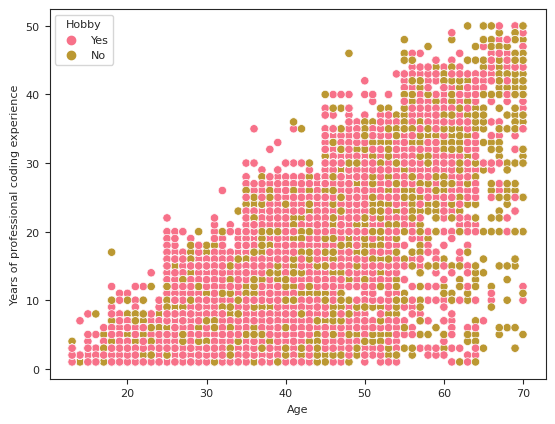

In [94]:
sns.scatterplot(x='Age_new1', y='YearsCodePro', hue='Hobby', data=age_yearscodepro_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

As the points are spread all over the graph, indicates that one can `start programming professionally at any age`.Also respondents who have decaded of programming experience seems to enjoy coding.

### 9. How much time is spent to search and answer solution to the problem encountered at work ?

In [95]:
# question asked in survey
schema_df1[['TimeSearching','TimeAnswering']]

qname
TimeSearching    On an average day, how much time do you typically spend searching for answers or solutions to problems you encounter at work? (This includes time spent searching on your own, asking a colleague, and waiting for a response).
TimeAnswering                                                                                                                                 On an average day, how much time do you typically spend answering questions you get asked at work?
Name: question, dtype: object

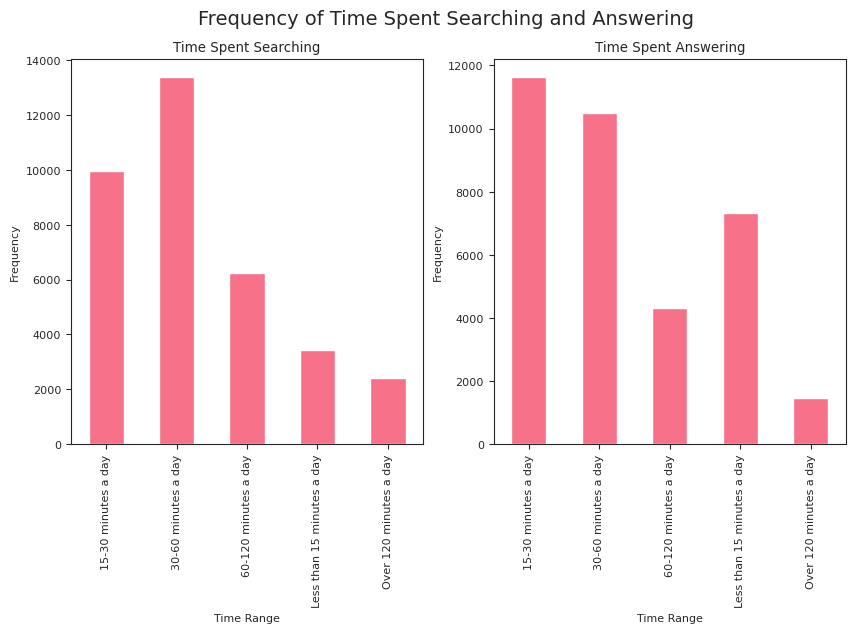

In [96]:
df_new=survey_df2[['TimeSearching','TimeAnswering']]

# Calculate the frequency of each response
freq = df_new.apply(pd.Series.value_counts)

# Create a subplot with two bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Frequency of Time Spent Searching and Answering', fontsize=14)

# Bar chart for TimeSearching
freq['TimeSearching'].plot(kind='bar', ax=ax1)
ax1.set_title('Time Spent Searching')
ax1.set_xlabel('Time Range')
ax1.set_ylabel('Frequency')

# Bar chart for TimeAnswering
freq['TimeAnswering'].plot(kind='bar', ax=ax2)
ax2.set_title('Time Spent Answering')
ax2.set_xlabel('Time Range')
ax2.set_ylabel('Frequency')

plt.show()

On an average day, majority of the repondents spent `30-60 minutes a day` to search answers or solutions to the problem which they encounter at work.Some respondents spent only `15-30 mins a day` to search solutions to the problem,very few spend `less than 15 minutes a day` and the least was spending over `120 minutes a day` for solution to the problem.

Time Spent Answering : The bar chart indicates large number of respondents are quick enough to answer questions as they only spent `15-30 minutes a day` ,some took `30-60 minutes a day` and few took only `less than 15 minutes a day`.
Very small number of respodents took more than `1 or 2 hours a day`.
  

The country with highest number of female respondents is USA about 25% of respondents followed by India with 11.42 %.
- The following are top 5 countries accounting for more than half (51.7%) of all female respondents in the dataset :
 * United States, India, United Kingdom, Germany, and Brazil.

### 10. What different professions female respondents are associated with ?

In [97]:
schema_df1['DevType']

'Which of the following describes your current job? Please select all that apply.'

In [98]:
survey_df2[['Gender','DevType']]

Column Names,Gender,DevType
0,Woman,"Developer, back-end"
1,Man,Engineering manager
2,Man,"Developer, full-stack"
3,Woman,"Developer, front-end;Developer, full-stack;Developer, back-end;Database administrator"
4,Man,"Developer, full-stack;Academic researcher;DevOps specialist"
...,...,...
36478,Man,"Developer, back-end;Student"
36479,Man,"Developer, full-stack"
36480,Man,"Developer, back-end"
36481,Man,Data scientist or machine learning specialist


In [99]:
female_df=survey_df2.loc[survey_df2['Gender'] == 'Woman'].reset_index(drop=True)

In [100]:
Female_Dev_df= split_multicolumn(female_df.DevType)
Female_Dev_df.loc[20:305]

,"Developer, back-end","Developer, front-end","Developer, full-stack",Database administrator,Student,"Developer, embedded applications or devices","Engineer, data",Designer,Scientist,"Developer, QA or test",...,"Developer, game or graphics",Academic researcher,Engineering manager,Blockchain,Project manager,System administrator,Educator,"Engineer, site reliability",Marketing or sales professional,"Senior Executive (C-Suite, VP, etc.)"
20,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22,False,False,True,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
23,True,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
24,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
302,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
303,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
304,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [101]:
#counting the total number of occurrences of each unique developer type
Female_DevType_count=Female_Dev_df.sum().sort_values(ascending=False)

# to Calculate the percentage of each value in the DevType_count Series
female_total_count = Female_DevType_count.sum()
female_DevType_percentage = Female_DevType_count / female_total_count * 100
female_DevType_df1=pd.DataFrame({'Type': Female_DevType_count.index,'Count':Female_DevType_count.values,'Percentage':female_DevType_percentage.values})
female_DevType_df1

,Type,Count,Percentage
0,"Developer, full-stack",729,20.216306
1,"Developer, back-end",619,17.165835
2,"Developer, front-end",520,14.420410
3,"Developer, mobile",191,5.296728
4,"Developer, desktop or enterprise applications",154,4.270660
5,"Developer, QA or test",98,2.717693
6,Designer,95,2.634498
7,DevOps specialist,92,2.551303
8,Data scientist or machine learning specialist,92,2.551303
9,"Engineer, data",86,2.384914


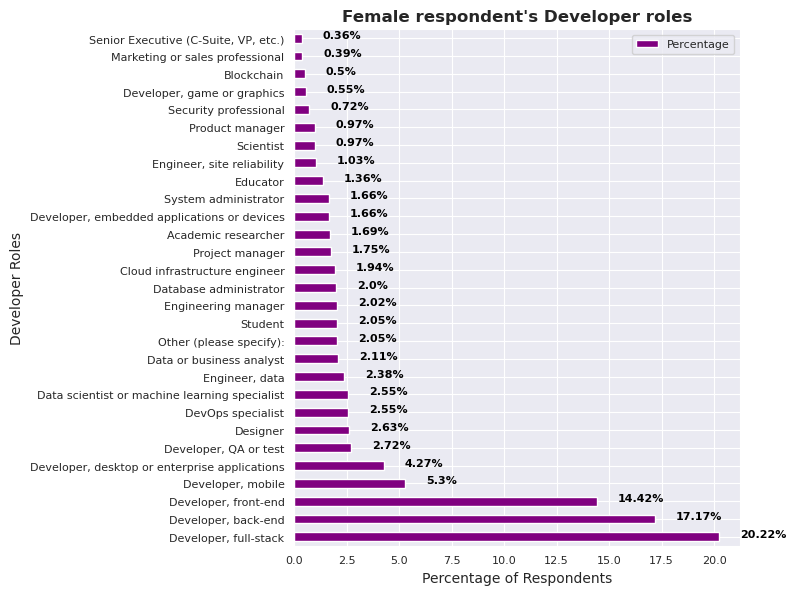

In [102]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))

# Create the horizontal bar chart
female_DevType_df1.plot.barh(x='Type', y='Percentage', ax=ax, color='purple')
# Set the title and axis labels
ax.set_title("Female respondent's Developer roles", fontsize=12, fontweight='bold')
ax.set_xlabel('Percentage of Respondents', fontsize=10)
ax.set_ylabel('Developer Roles', fontsize=10)

# Add labels to the bars
for i, v in enumerate(female_DevType_df1.Percentage):
    ax.text(v + 1, i, str(round(v, 2)) + '%', color='black', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

It is interesting, that Female Senior Executives(0.36%),Maketing and Sales professional(0.39%) took this survey and showed their skill diversity.
But overall, 20.22 % of the total female respondents are Developer, Full-stack profession followed by Developer,back-end at 17.17 % and DEveloper,front-end at 14.2 %.

### 11. Countries with female respondents.

In [103]:
survey_df2[['Gender','Country']]

Column Names,Gender,Country
0,Woman,Netherlands
1,Man,United States of America
2,Man,United States of America
3,Woman,Australia
4,Man,United States of America
...,...,...
36478,Man,Belgium
36479,Man,France
36480,Man,Nigeria
36481,Man,United States of America


In [104]:
female_countries = survey_df2.loc[survey_df2['Gender'] == 'Woman', 'Country']

# countries with the highest number of respondents
female_country_count=female_countries.value_counts(ascending=False)

# dataframe having columns for counts and percentage for number of respondents
female_country_df =pd.DataFrame({ 'Country': female_country_count.index, 'Count': female_country_count.values})

#percentage
total_female_respondents = female_country_df['Count'].sum()
female_country_df['Percentage'] = (female_country_df['Count'] / total_female_respondents) * 100
female_country_df

,Country,Count,Percentage
0,United States of America,441,24.817107
1,India,203,11.423748
2,United Kingdom of Great Britain and Northern Ireland,112,6.302757
3,Germany,92,5.177265
4,Brazil,70,3.939223
...,...,...,...
102,Isle of Man,1,0.056275
103,The former Yugoslav Republic of Macedonia,1,0.056275
104,Belarus,1,0.056275
105,Yemen,1,0.056275


In [105]:
import folium 
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

female_country_df.at[0, 'Country'] = 'United States of America'
female_country_df.at[12, 'Country'] = 'Russia'



m = folium.Map(location=[30, 0], zoom_start=2,tiles='Stamen Terrain')

folium.Choropleth(
    geo_data=countries_geojson,
    data=female_country_df,
    columns=["Country", "Percentage"],
    key_on="feature.properties.name",
    threshold_scale=[0,2,5,8,10,15,25],
    nan_fill_color="Black",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Respondents",
    highlight=True,
    smooth_factor=0
).add_to(m)

# Add a title to the map
title_html = '<h3 align="center" style="font-size:16px"><b>Respondent Count by Country</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

m

In [106]:
# to find top 5 countires with most women
most_women_country=female_country_df.nlargest(5,'Percentage')
most_women_country

,Country,Count,Percentage
0,United States of America,441,24.817107
1,India,203,11.423748
2,United Kingdom of Great Britain and Northern Ireland,112,6.302757
3,Germany,92,5.177265
4,Brazil,70,3.939223


The countries with the most women respondents are:

* United States of America
* India
* United Kingdom of Great Britain and Northern Ireland
* Germany
* Brazil

In [107]:
# filter the female_country_df by percentage less than 5%
countries_less_than_5 = female_country_df[female_country_df['Count'] < 5]

# select only the 'Country' column and convert it to a list
countries_list = countries_less_than_5['Country'].tolist()

# print the list of countries
print(countries_list)


['Hungary', 'Nigeria', 'Armenia', 'Lebanon', 'United Arab Emirates', 'Indonesia', 'Slovakia', 'Colombia', 'Syrian Arab Republic', 'Viet Nam', 'Peru', 'Hong Kong (S.A.R.)', 'Sri Lanka', 'Tunisia', 'Kazakhstan', 'Ethiopia', 'Ecuador', 'Malta', 'Kyrgyzstan', 'Bolivia', 'Uruguay', 'Mauritius', 'Cyprus', 'Albania', 'Bosnia and Herzegovina', 'Republic of Korea', 'Iraq', 'Guyana', 'Bahamas', 'Palestine', 'Qatar', 'Kuwait', 'Myanmar', 'Maldives', 'Paraguay', 'Nepal', 'Uganda', 'Latvia', 'Jamaica', 'Montenegro', 'Nicaragua', 'Algeria', 'Guatemala', 'Mongolia', 'Venezuela, Bolivarian Republic of...', 'Sudan', 'Costa Rica', 'Dominican Republic', 'Honduras', 'Afghanistan', 'Isle of Man', 'The former Yugoslav Republic of Macedonia', 'Belarus', 'Yemen', 'Bahrain']


Countries with least women respondents by regions are : 

* `Africa`: Nigeria, Ethiopia, Tunisia, Uganda, Algeria, Sudan, Mauritius and Lebanon.
* `Asia`: Indonesia, Viet Nam, Hong Kong (S.A.R.), Sri Lanka, Kazakhstan, Maldives, Myanmar, Nepal, Kyrgyzstan and Mongolia.
* `Europe`: Hungary,Armenia,Slovakia,Malta,Cyprus,Albania,Bosnia and Herzegovina,Latvia,Montenegro,Belarus,Isle of Man and The former Yugoslav Republic of Macedonia.
* `North America and the Caribbean:`: Bahamas,Jamaica,Nicaragua,Guatemala,Honduras,Costa Rica and Dominican Republic.
* `South America`: Colombia,Bolivia,Uruguay,Guyana,Ecuador,Paraguay,Venezuela and Bolivarian Republic of Venezuela.
* `Middle East`: UAE,Syrian Arab Republic,Iraq,Palestine,Qatar,Kuwait,Yemen and Bahrain.

### Inferences and Conclusion 

Summary of inferences drawn from survey :

1. Based on the survey respondent's demographics, the survey is moderately representative of the overall programming community.It is possible that the survey in English-language may have contributed to the under-representation of respondents from non-English speaking countries. 
It is also likely that the countries shown in black on the survey map may have restrictions on accessing third-party survey software, and some respondents have used VPNs to get over the block as mentioned by the Stack Overflow official. These factors may have limited the survey's global reach and also may have impacted the diversity of the respondent.


2. The majority of survey respondents are men, about 93.1% of while only 4.9% of respondents identified as female. The remaining gender minorities are less than 1% of the total respondents. This shows that there is a significant gender gap in the programming community, with men being overrepresented and women being underrepresented. 
As things are improving, we should make more efforts to support & encourage underrepresented communities to pursue careers in programming.


3. Programming may be a hobby or passion for some individuals regardless of their formal education level. Overall, the higher education may be an advantage in the programming field, but it is not a requirement for success or enjoyment of programming.
Also,there are significant difference and barriers,preventing women and other underrepresented communities from pursuing higher education and/or entering the programming field.


4. Full-time employment is the most common type of employment among programmers.Overall, programming can be a viable career option for individuals with different backgrounds and employment statuses.


5. The survey primarily has captured responses from individuals who work as developers(80.9%) or in related technical roles.The survey may be was most relevant to individuals working in technical roles, such as developers, and less relevant to individuals working in non-technical roles, such as marketing or sales.


6. The age range to which most of the respondents belong is 25-34 years old, with 38.36% falling into this category. There are  multiple factors for this,prevalence of programming roles among this age group, their familiarity with online programming resources, and their level of interest in participating in programming surveys and communities.


7. The largest percentage of survey respondents have 1-10 years of professional coding experience, with 58.15% of respondents falling into this category.Possible reasons could be increasing popularity of coding bootcamps and other online educational programs that aim to help individuals transition into programming roles. 
Overall,we find significant demand for programming resources and support among individuals who are new to the profession, and platforms like Stack Overflow plays an important role in helping out these individuals hone skills and connect with other developers.


8. Majority of respondents(62.76 %) enjoy programming outside of their work, either its their personal interest or as a way to build their skills and stay connected with the programming community.This suggests that there is a strong interest for programming as a personal pursuit among the developer community.
Minority of respondents (around 23%) indicated that they do not code as a hobby.May be due to a factors,like such time constraints or a lack of interest in programming outside of work.


9. We also find, Men are more likely than women and non-binary individuals to engage in programming as a hobby.This disparity is may be due to factors, such as socialization, discrimination, or significant differences in access to educational or professional opportunities.
This highlights the need for greater inclusion and diversity within the programming community.


10. United States and India are the top two countries where respondents have coding as a hobby, with 20.0% and 8.7% of total respondents, respectively.May be because the majority of survey respondents are from the United States and India, so it is possible that the high percentage of respondents who code as a hobby in these countries simply reflects the larger sample size. 
Or, may be due to cultural, economic, or educational factors that influence individual's tendency to engage in programming as a personal pursuit or hobby.


11. Companies with employee size < 5,000: use both HTML/CSS and JavaScript languages, but they don't use Python.But,companies with larger employee size : 5,000 to 9,999 employees and 10,000 or more employees have Python as their second best language after JavaScript.
We should note that the popularity of a language can be influenced by its community and the availability of resources to learn and also job opportunities.


12. About 69.61 % of the total respondents learn to code from online sources such as videos,blogs etc. With the tremendous growth of the internet and the availability of free resources, it has become easier for people to learn coding online. 


13. JavaScript is currently the most popular programming language worldwide, followed by SQL and HTML/CSS. This attributes to the fact that many developers work with web development and front-end technologies, which require proficiency in these languages.


14. The analysis also suggests that the attitudes towards blockchain technology are mixed, we find significant proportion of respondents are either indifferent or unsure about it. Indicating a lack of understanding or awareness about the benefits and applications of blockchain technology.
The reason for range of attitudes towards blockchain technology could also be due to various factors such as cultural differences, geographic location, and professional background.


15. Majority of programmers who responded to the survey do not have mental health conditions. But, it is worth noting that the data only includes self-reported mental health conditions, and there may be respondents who have mental health conditions but did not report them.


16. Based on analysis it appears that most developers spend a moderate amount of time searching for answers or solutions to problems encountered at work, with the majority spending between `30-60 minutes a day`. 
Which indicates that developers are actively seeking out information and resources to get help on problems and improve their skills. Also, the fact that relatively few developers spend more than `an hour or two a day` searching for solutions indicates that they are able to efficiently find the information they need. This may be due to the abundance of online resources and developer's communities available, as well as the developer's own expertise and experience.


17. The majority of female respondents identified themselves as developers, with full-stack, back-end, and front-end being the top roles. This sshows the growing trend of women in the tech industry and their increasing participation in coding-related roles.


18. The top five countries with the most women respondents in the survey are the USA, India, the UK of Great Britain and Northern Ireland, Germany, and Brazil. 
On the other hand, the countries with the least women respondents by regions were some countires of Africa,Asia,Europe,North and south America and Middle East.
It is worth noting that ithese results may be influenced by various factors such as cultural and societal norms, language barriers, and technological infrastructure, among others.


### Future Work 

The survey data of more than 70,000 rows and 79 columns is of no doubt on wealth of information to be discovered and having discovered some, in future I would like to work on :

1. Explore survey responses and attitude across developer roles. Eg. How does attitude towards blockchain differs different professional roles.


2. Compare years of professional coding experience across different genders.


3. Prepare analysis focusing on countries - to identify which cloud platform they use most, how enthusiasts are learning to code in countries whcih has minimum internet facilities and exposure to technologies.


### References

Can check out the following resources to learn more about the dataset and tools used in this notebook:

* Stack Overflow Developer Survey : https://insights.stackoverflow.com/survey
* Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
* Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
* Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
* opendatasets Python library: https://github.com/JovianML/opendatasets
* https://jovian.com/learn/zero-to-data-analyst-bootcamp
